In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from preprocessing import *

ModuleNotFoundError: No module named 'preprocessing'

## Data Importing
Here, we import issuance screens, which contain summary info for the top 1000 most recently issued Auto, Card, and Consumer ABS securities. 

In [2]:
# directory: str = 'C:/Users/bishj/OneDrive/College Notebook/Boston University/Fall Senior Year/CS 506/Project/CS506-Fall2020-Projects/consumer_abs'
directory: str = 'D:/OneDrive/College Notebook/Boston University/Fall Senior Year/CS 506/Project/CS506-Fall2020-Projects/consumer_abs'
data_directory: str = directory + '/data'


In [3]:
## STUDENT IS MESSED UP CURRENTLY 
issuanceScreens: list = ['AUTO', 'CARD']
issuanceDataFrames: dict = {}
    
for i in issuanceScreens:
    df: pd.DataFrame = pd.read_excel(data_directory + f"/{i}_ABS_ISSUANCE.xlsx")
    df['Issue Date'] = pd.to_datetime(df['Issue Date'])    
    
    issuanceDataFrames[f"{i}_ABS_ISSUANCE"] = df

In [4]:
issuanceDataFrames['AUTO_ABS_ISSUANCE']

,Issuer Name,CUSIP,Security Name,Mortgage Original Amount,Cpn,Is Floater,Is Mortgage Paid Off,TRACE Eligible,Issue Date,Maturity,Moody Rtg,Num of Loans,Number of Pools/Loans,Amt Out,Average Original Loan Size,Coupon Type
0,Hertz Vehicle Financing II LP,42806DBQ1,HERTZ 2018-1A A,764020000.0,3.29,N,N,Y,2018-01-24,2/25/2024,Baa3 *+,1,1.0,2.981603e+08,1.058200e+09,FIXED
1,Hertz Vehicle Financing II LP,42806DCD9,HERTZ 2019-1A A,538142000.0,3.71,N,N,Y,2019-02-06,3/25/2023,Baa3 *+,1,1.0,2.103895e+08,7.453030e+08,FIXED
2,Hertz Vehicle Financing II LP,42806DCN7,HERTZ 2019-3A A,576350000.0,2.67,N,N,Y,2019-11-26,12/26/2025,Baa3 *+,1,1.0,2.228799e+08,7.996890e+08,FIXED
3,GMF Floorplan Owner Revolving Trust,361886CH5,GFORT 2020-1 A,548500000.0,0.68,N,N,Y,2020-09-16,8/15/2025,Aaa,NaN,NaN,5.485000e+08,NaN,FIXED
4,Hertz Vehicle Financing II LP,42806DAH2,HERTZ 2015-3A A,265265000.0,2.67,N,N,Y,2015-10-07,9/25/2021,Baa3 *+,1,1.0,1.012522e+08,3.711560e+08,FIXED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,Avis Budget Rental Car Funding AESOP LLC,05377RBJ2,AESOP 2012-3A C,33300000.0,4.23,N,Y,N,2013-09-09,3/20/2019,WR,1,1.0,0.000000e+00,7.230000e+08,FIXED
2436,Avis Budget Rental Car Funding AESOP LLC,05377RBM5,AESOP 2013-1A C,35700000.0,4.42,N,Y,N,2013-09-09,9/20/2019,NaN,0,0.0,0.000000e+00,NaN,FIXED
2437,Capital One Prime Auto Receivables Trust 2019-2,BCC2LARU5,COPAR 2019-2 B,14108000.0,2.16,N,N,N,2019-09-18,3/17/2025,NaN,1,1.0,1.410800e+07,1.410746e+09,FIXED
2438,Capital One Prime Auto Receivables Trust 2019-2,BCC2LARW1,COPAR 2019-2 D,14108000.0,2.69,N,N,N,2019-09-18,1/15/2026,NaN,1,1.0,1.410800e+07,1.410746e+09,FIXED


In [5]:
issuanceDF: pd.DataFrame = pd.concat([issuanceDataFrames[i] for i in issuanceDataFrames])
issuanceDF.reset_index(inplace=True)
issuanceDF.drop('index', inplace=True, axis=1)
issuanceDF.head(10)

,Issuer Name,CUSIP,Security Name,Mortgage Original Amount,Cpn,Is Floater,Is Mortgage Paid Off,TRACE Eligible,Issue Date,Maturity,Moody Rtg,Num of Loans,Number of Pools/Loans,Amt Out,Average Original Loan Size,Coupon Type
0,Hertz Vehicle Financing II LP,42806DBQ1,HERTZ 2018-1A A,764020000.0,3.29,N,N,Y,2018-01-24,2/25/2024,Baa3 *+,1,1.0,2.981603e+08,1.058200e+09,FIXED
1,Hertz Vehicle Financing II LP,42806DCD9,HERTZ 2019-1A A,538142000.0,3.71,N,N,Y,2019-02-06,3/25/2023,Baa3 *+,1,1.0,2.103895e+08,7.453030e+08,FIXED
2,Hertz Vehicle Financing II LP,42806DCN7,HERTZ 2019-3A A,576350000.0,2.67,N,N,Y,2019-11-26,12/26/2025,Baa3 *+,1,1.0,2.228799e+08,7.996890e+08,FIXED
3,GMF Floorplan Owner Revolving Trust,361886CH5,GFORT 2020-1 A,548500000.0,0.68,N,N,Y,2020-09-16,8/15/2025,Aaa,NaN,NaN,5.485000e+08,NaN,FIXED
4,Hertz Vehicle Financing II LP,42806DAH2,HERTZ 2015-3A A,265265000.0,2.67,N,N,Y,2015-10-07,9/25/2021,Baa3 *+,1,1.0,1.012522e+08,3.711560e+08,FIXED
5,Carmax Auto Owner Trust 2019-3,14315PAD7,CARMX 2019-3 A3,486100000.0,2.18,N,N,Y,2019-07-30,8/15/2024,NaN,1,1.0,4.861000e+08,1.503760e+09,FIXED
6,Tesla Auto Lease Trust 2018-B,88161NAA7,TESLA 2018-B A,673680000.0,3.71,N,N,Y,2018-12-19,8/20/2021,Aaa,1,1.0,3.507126e+08,9.197061e+08,FIXED
7,Hertz Vehicle Financing II LP,42806DCH0,HERTZ 2019-2A A,576525000.0,3.42,N,N,Y,2019-05-29,5/25/2025,Baa3 *+,1,1.0,2.252390e+08,7.985100e+08,FIXED
8,Drive Auto Receivables Trust 2019-1,26208NAF1,DRIVE 2019-1 C,164470000.0,3.78,N,N,Y,2019-01-23,4/15/2025,Aaa,1,1.0,1.644700e+08,1.284911e+09,FIXED
9,Hertz Vehicle Financing II LP,428040CU1,HERTZ 2017-1A A,324900000.0,2.96,N,N,Y,2017-09-20,10/25/2021,Baa3 *+,1,1.0,1.268500e+08,4.500000e+08,FIXED


## Mean Issuance by Year
From the chart below, it's clear that the average size of card ABS is increasing. Auto is reamining flat, and consumer is falling but that's most likely a data issue since the "consumer" category is being narrowed.

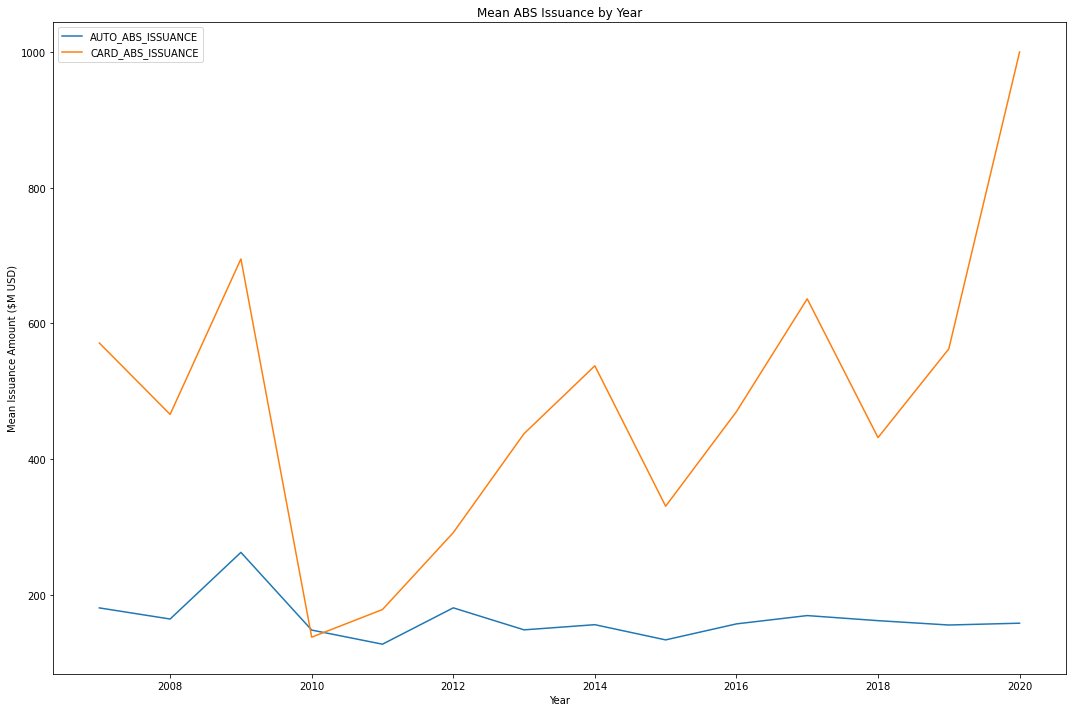

In [6]:
fig = plt.figure(figsize=(15,10))

for i in issuanceDataFrames:
    mean_issuance_by_year=issuanceDataFrames[i].groupby(issuanceDataFrames[i]['Issue Date'].map(lambda x: x.year)).mean()
    amount_in_millions=mean_issuance_by_year['Mortgage Original Amount']/1e6
    
    plt.plot(mean_issuance_by_year.index, amount_in_millions, label = i)
    
plt.legend()
plt.title('Mean ABS Issuance by Year')
plt.ylabel('Mean Issuance Amount ($M USD)')
plt.xlabel("Year")
plt.tight_layout()
_=plt.show()

## Security Finder Data
This data contains the top 1000 most recent ABS and is filtered by subsector, cash flow (whether or not the security is still generating cashflows), and the coupon type (broadly 4 categories).

In [7]:
SUBSECTORS: list=['AUTO', 'CARD']
CFs: list=['Y', 'PD']
TYPES: list=['FLT', 'SUB', 'SEQ', 'SB']

SECF_Dict: dict = {}

for i in SUBSECTORS:
    for j in CFs:
        for k in TYPES:
            if (i=='AUTO') & (j=='Y') & (k=='SB'):
                continue
            else:

                df: pd.DataFrame=pd.read_excel(data_directory+f"/{i}_ABS_{j}_{k}.xlsx")

                SECF_Dict[f"{i}_{j}_{k}"]=df


In [8]:
SECF_DF: pd.DataFrame = pd.concat([SECF_Dict[i] for i in SECF_Dict])
SECF_DF=SECF_DF[SECF_DF.Ticker!='#N/A Review']
SECF_DF.reset_index(inplace=True)
SECF_DF.drop('index', inplace=True, axis=1)

In [9]:
# Since each dataframe is just top 1000 from Bloomberg, we need to make sure we don't have overrepresentation of any type of issuance
SECF_DF['Issued']=pd.to_datetime(SECF_DF['Issued'])
SECF_DF.head(10)

,CF,Ticker,Series,Class,Coupon,Maturity,Original Amount,Factor,Private,Type,Country,Currency,Issued,Sub Sector,SSA
0,Y,GMALT,2020-3,A2B,0.56638,11/21/2022,50000000,1,N,FLT,US,USD,2020-09-29,AUTO 6.8,NaN
1,Y,FORDF,2020-1,A2,0.64838,9/15/2025,150000000,1,N,FLT,US,USD,2020-09-18,AUTO 0,NaN
2,Y,FORDL,2020-B,A2B,0.40838,12/15/2022,100000000,1,N,FLT,US,USD,2020-07-24,AUTO 5.6,NaN
3,Y,AMCAR,2020-2,A2B,0.49725,12/18/2023,50000000,1,N,FLT,US,USD,2020-07-22,AUTO 11.9,NaN
4,Y,CARMX,2020-3,A2B,0.39838,6/15/2023,50000000,1,N,FLT,US,USD,2020-07-22,AUTO 6.8,NaN
5,Y,SDART,2020-2,A2B,0.49838,5/15/2023,75000000,1,N,FLT,US,USD,2020-07-22,AUTO 11.8,NaN
6,Y,NAROT,2020-B,A2B,0.32838,10/17/2022,50000000,1,N,FLT,US,USD,2020-06-30,AUTO 3.2,NaN
7,Y,WLAKE,2020-2X,A2B,0.77838,2/15/2024,50000000,1,N,FLT,US,USD,2020-06-23,AUTO 19.5,NaN
8,Y,DRIVE,2020-2,A2B,0.67838,7/17/2023,65000000,0.865195,N,FLT,US,USD,2020-06-17,AUTO 18.9,NaN
9,Y,GMALT,2020-2,A2B,0.55138,10/20/2022,60000000,1,N,FLT,US,USD,2020-06-17,AUTO 6.8,NaN


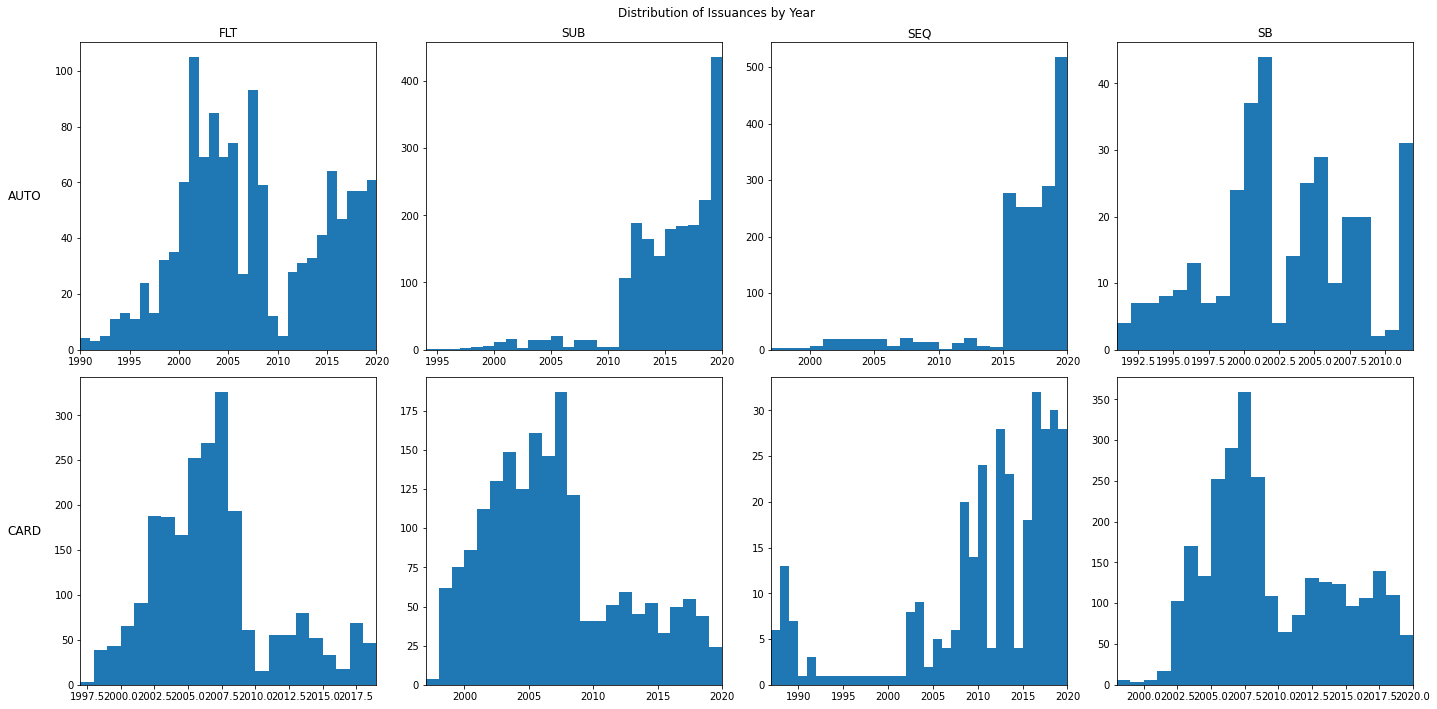

In [10]:
fig, axes = plt.subplots(nrows=len(SUBSECTORS), ncols=len(TYPES), figsize=(20,10))

for j, i in enumerate(SUBSECTORS):
    for l, k in enumerate(TYPES):
        # ax[i, j].plot(SECF_DF[SECF_DF['Sub Sector'].str.contains(i) and SECF_DF['Type']==k].groupby(SECF_DF['Issued'].dt.year).count()['Issued'])
        df=SECF_DF[(SECF_DF['Sub Sector'].str.contains(i)) & (SECF_DF['Type'].str.contains(k))]['Issued'].dt.year
        axes[j,l].hist(df, bins=np.unique(df), density=False, )
        axes[j,l].margins(x=0)
        
pad=5
for ax, col in zip(axes[0], TYPES):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], SUBSECTORS):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
fig.suptitle('Distribution of Issuances by Year')
fig.tight_layout()        

In [11]:
# Choose 2000 since CARD issuances before 2000 are scarce 
SECF_DF=SECF_DF.where(SECF_DF['Issued'].dt.year >= 2000)

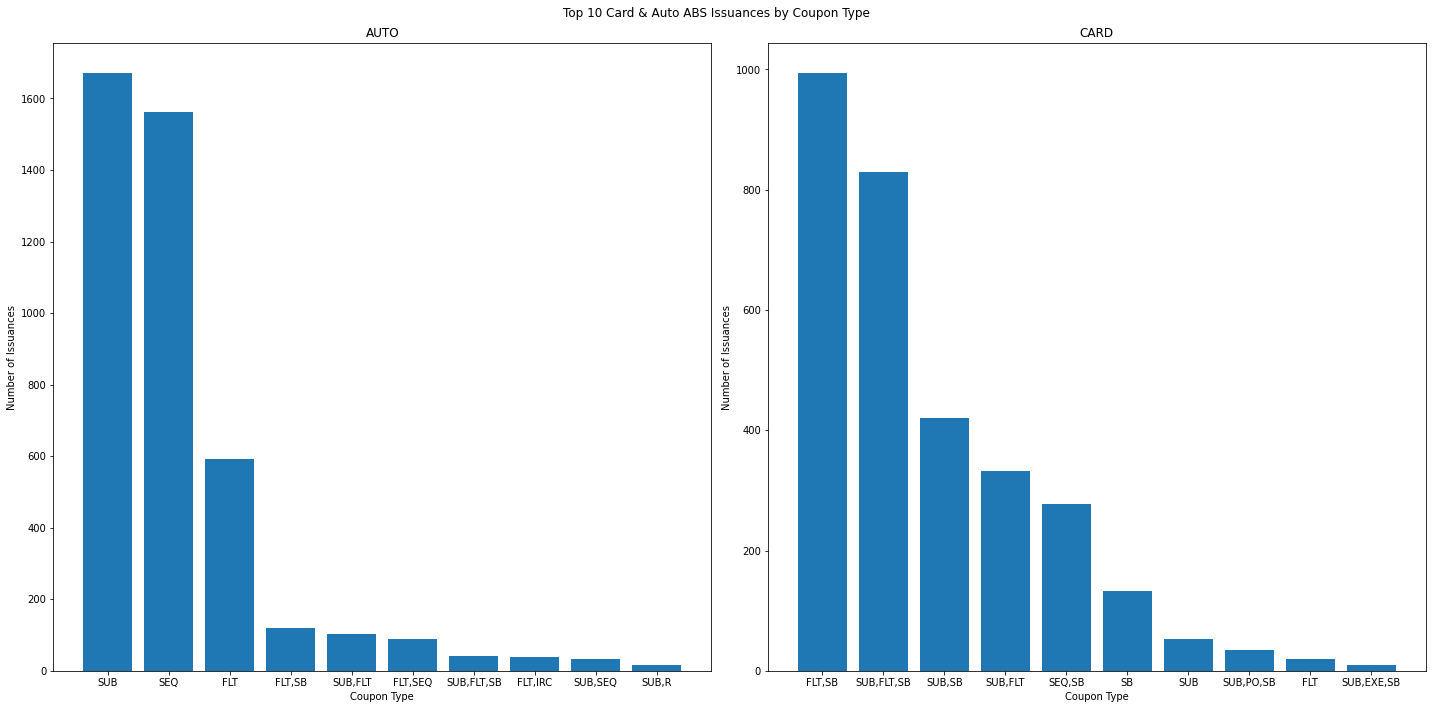

In [12]:
fig, axes = plt.subplots(ncols=len(SUBSECTORS), figsize=(20,10))

for j,i in enumerate(SUBSECTORS):
    axes[j].bar(SECF_DF[SECF_DF['Sub Sector'].str.contains(i, na=False)].Type.value_counts().index[:10], SECF_DF[SECF_DF['Sub Sector'].str.contains(i, na=False)].Type.value_counts()[:10])
    axes[j].set_xlabel('Coupon Type')
    axes[j].set_ylabel('Number of Issuances')
    
    axes[j].set_title(i)
    
fig.suptitle('Top 10 Card & Auto ABS Issuances by Coupon Type')


plt.tight_layout()

## Heatmaps
The following heatmaps show the number of issuances by coupon type and the average dollar amount by coupon type. The limitation of these heatmaps is that each intersection contains only 2 dimensions, i.e. the total number or average dollar amount of a security with 3 coupon categorizations won't be represented in its entirety. This being the case, it seemed more useful to condense into the 4 main categories of coupon type: Floating, Soft Bullet, Subordinated, and Sequential.

In [13]:
arr=[i.split(',') for i in SECF_DF['Type'].dropna().unique()]
unique_types=set(x for l in arr for x in l)
unique_types

{'AFC',
 'ARB',
 'ARS',
 'CAM',
 'CMPLX',
 'CSTR',
 'DLY',
 'EXE',
 'FLT',
 'FTV',
 'IRC',
 'MEZ',
 'OC',
 'PO',
 'PT',
 'R',
 'SB',
 'SC',
 'SEQ',
 'STEP',
 'SUB',
 'TAC',
 'XRESET'}

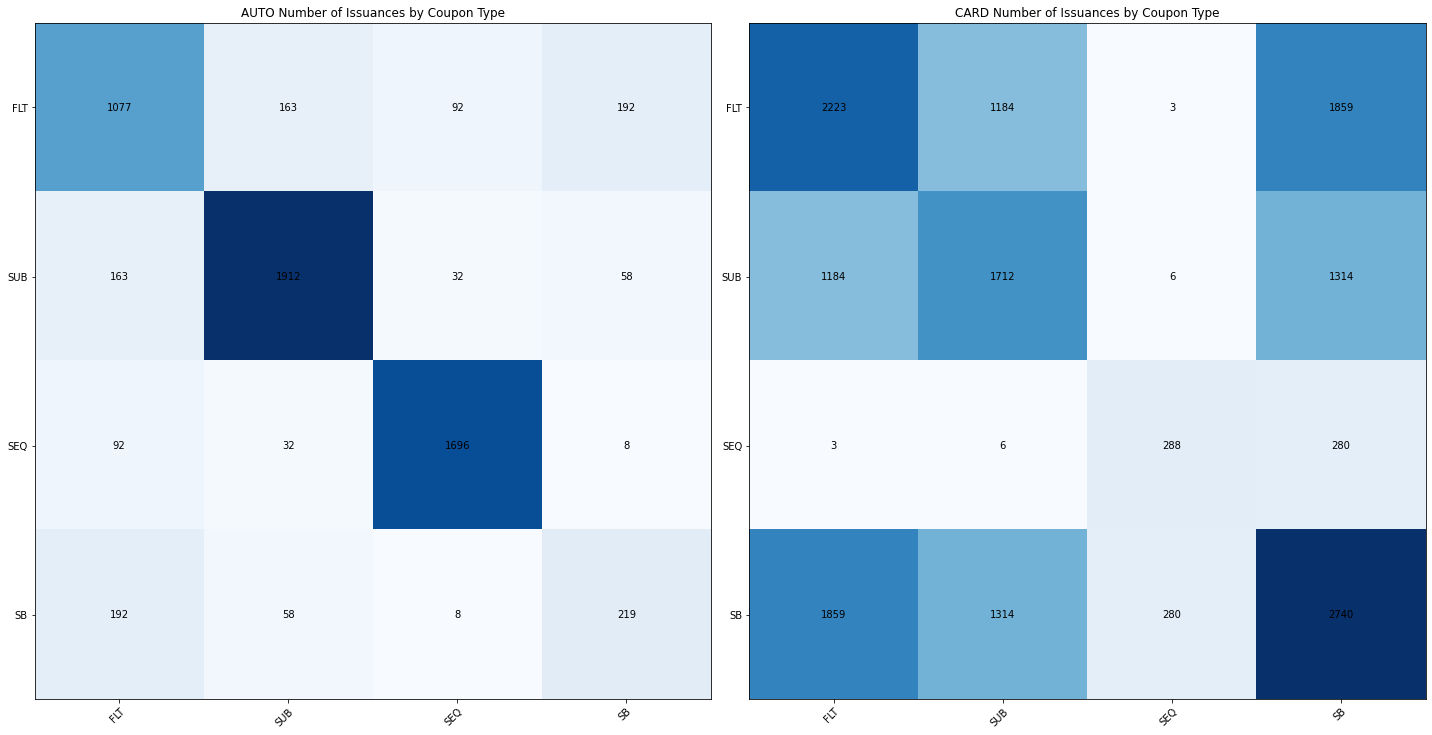

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(20,15))

cmap=plt.get_cmap('Blues')

for num, subsector in enumerate(SUBSECTORS):
    heatmapData: list = []

    for i in TYPES:
        heatmapData.append([len(SECF_DF[(SECF_DF['Type'].str.contains(i, na=False)) & (SECF_DF['Type'].str.contains(j, na=False)) & (SECF_DF['Sub Sector'].str.contains(subsector, na=False))]) for j in TYPES])

    heatmapData=np.array(heatmapData)
    
    im = ax[num].imshow(heatmapData, cmap=cmap)
    ax[num].set_xticks(np.arange(len(TYPES)))
    ax[num].set_yticks(np.arange(len(TYPES)))

    ax[num].set_xticklabels(TYPES)
    ax[num].set_yticklabels(TYPES)

    plt.setp(ax[num].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    ax[num].set_title(f"{subsector} Number of Issuances by Coupon Type")

    for i in range(len(TYPES)):
        for j in range(len(TYPES)):
            if heatmapData[i,j]==0:
                text = ax[num].text(j, i, heatmapData[i, j],
                               ha="center", va="center", color="w")

            else:
                 text = ax[num].text(j, i, heatmapData[i, j],
                               ha="center", va="center", color="black")


fig.tight_layout()
plt.show()

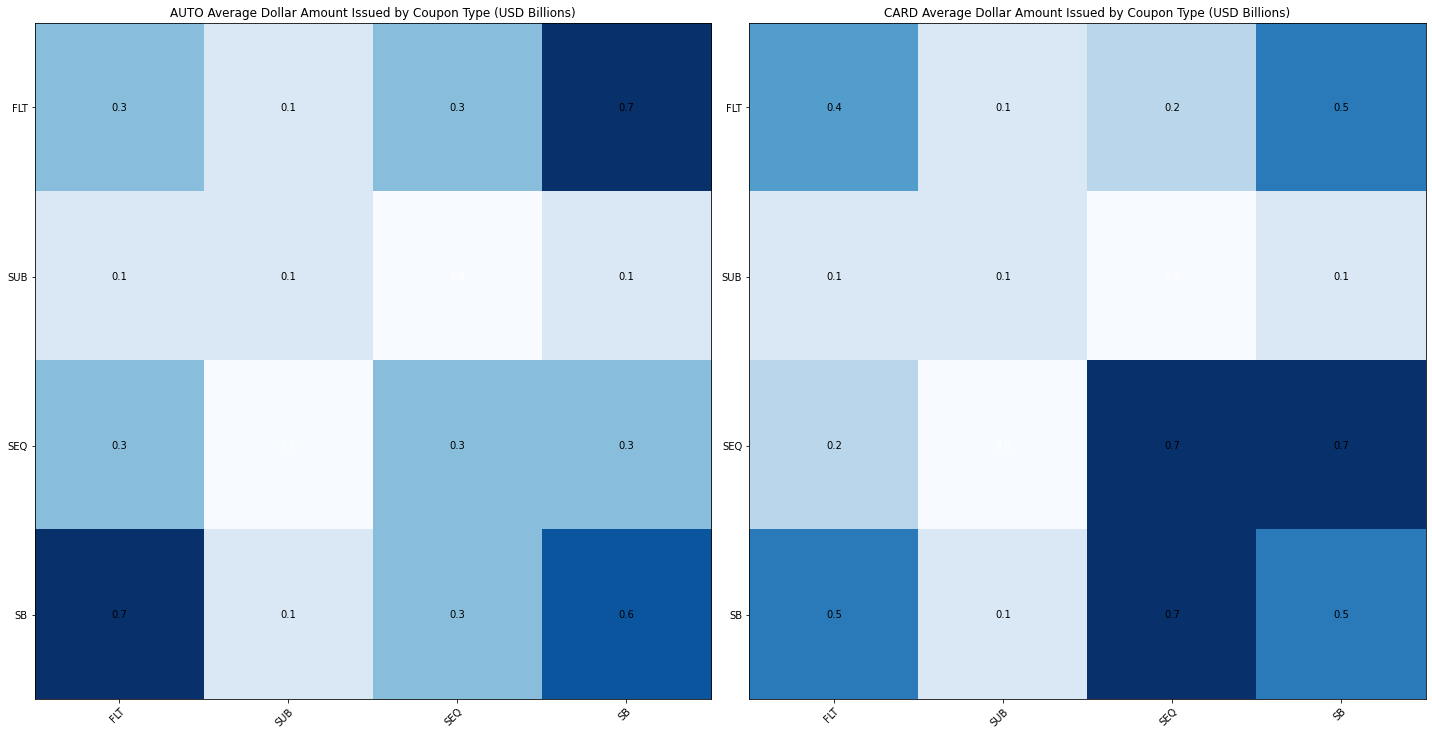

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(20,15))

cmap=plt.get_cmap('Blues')

for num, subsector in enumerate(SUBSECTORS):
    heatmapData: list = []

    for i in TYPES:
        heatmapData.append([(SECF_DF[(SECF_DF['Type'].str.contains(i, na=False)) & (SECF_DF['Type'].str.contains(j, na=False)) & (SECF_DF['Sub Sector'].str.contains(subsector, na=False))]['Original Amount']).mean() for j in TYPES])

    heatmapData=np.array(heatmapData)
    heatmapData=np.nan_to_num(heatmapData)
    heatmapData=np.round(heatmapData/1e9, 1)
    
    im = ax[num].imshow(heatmapData, cmap=cmap)
    ax[num].set_xticks(np.arange(len(TYPES)))
    ax[num].set_yticks(np.arange(len(TYPES)))

    ax[num].set_xticklabels(TYPES)
    ax[num].set_yticklabels(TYPES)

    plt.setp(ax[num].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    ax[num].set_title(f"{subsector} Average Dollar Amount Issued by Coupon Type (USD Billions)")

    for i in range(len(TYPES)):
        for j in range(len(TYPES)):
            if heatmapData[i,j]==0:
                text = ax[num].text(j, i, heatmapData[i, j],
                               ha="center", va="center", color="w")

            else:
                 text = ax[num].text(j, i, heatmapData[i, j],
                               ha="center", va="center", color="black")


fig.tight_layout()
plt.show()

## TRACE Eligibility
One of the components of this project is examining how these securities are priced and how that price has changed over the years. In examining issuance amount, collateral risk, etc. we don't want to leave out securities for which pricing data isn't available. However, we also need to see what proportion of securities included in the data do have pricing available, which means we need to see which securities are TRACE eligible. To do so, we cross reference our SRCH and SECF dataframes.

In [16]:
idxs: list = []
    
df1: pd.DataFrame=pd.DataFrame(columns=SECF_DF.columns)
df2: pd.DataFrame=pd.DataFrame(columns=issuanceDF.columns)
for i in range(len(SECF_DF)):
    temp:pd.DataFrame=issuanceDF[(issuanceDF['Security Name']==str(SECF_DF.loc[i]['Ticker']) + " " + str(SECF_DF.loc[i]['Series']) + " " + str(SECF_DF.loc[i]['Class'])) &
                                 (issuanceDF['TRACE Eligible']=='Y')]
    
    if len(temp) > 0:
        idxs.append(i)
        df1=pd.concat([df1, pd.DataFrame(SECF_DF.iloc[i]).T])
        df2=pd.concat([df2, temp])


In [22]:
df3=pd.concat([df1.reset_index(), df2.reset_index().drop('Maturity', axis=1)], axis=1, sort=False)
df3.drop('index', axis=1, inplace=True)
df3['Maturity']=pd.to_datetime(df3['Maturity'])
df3.head(10)

,CF,Ticker,Series,Class,Coupon,Maturity,Original Amount,Factor,Private,Type,...,Is Floater,Is Mortgage Paid Off,TRACE Eligible,Issue Date,Moody Rtg,Num of Loans,Number of Pools/Loans,Amt Out,Average Original Loan Size,Coupon Type
0,Y,FORDF,2020-1,A2,0.64838,2025-09-15,150000000,1,N,FLT,...,Y,N,Y,2020-09-18,Aaa,#N/A Field Not Applicable,NaN,1.500000e+08,NaN,FLOATING
1,Y,FORDL,2020-B,A2B,0.40838,2022-12-15,100000000,1,N,FLT,...,Y,N,Y,2020-07-24,Aaa,1,1.0,1.000000e+08,1.606686e+09,FLOATING
2,Y,AMCAR,2020-2,A2B,0.49725,2023-12-18,50000000,1,N,FLT,...,Y,N,Y,2020-07-22,NaN,1,1.0,5.000000e+07,1.105209e+09,FLOATING
3,Y,CARMX,2020-3,A2B,0.39838,2023-06-15,50000000,1,N,FLT,...,Y,N,Y,2020-07-22,NaN,1,1.0,5.000000e+07,1.358149e+09,FLOATING
4,Y,SDART,2020-2,A2B,0.49838,2023-05-15,75000000,1,N,FLT,...,Y,N,Y,2020-07-22,Aaa,1,1.0,7.500000e+07,1.676631e+09,FLOATING
5,Y,DRIVE,2020-2,A2B,0.67838,2023-07-17,65000000,0.865195,N,FLT,...,Y,N,Y,2020-06-17,Aaa,1,1.0,6.472942e+07,1.271513e+09,FLOATING
6,Y,CARMX,2020-2,A2B,1.44838,2023-01-17,65000000,0.999878,N,FLT,...,Y,N,Y,2020-04-29,NaN,1,1.0,6.500000e+07,1.156942e+09,FLOATING
7,Y,SDART,2020-1,A2B,1.69838,2023-01-17,50000000,0.708549,N,FLT,...,Y,N,Y,2020-04-22,Aaa,1,1.0,4.224071e+07,1.247661e+09,FLOATING
8,Y,AMCAR,2020-1,A2B,0.49725,2023-03-20,70000000,0.841744,N,FLT,...,Y,N,Y,2020-03-11,Aaa,1,1.0,6.585064e+07,9.794211e+08,FLOATING
9,Y,HDMOT,2020-A,A2B,0.29838,2023-01-17,21000000,0.670733,N,FLT,...,Y,N,Y,2020-01-29,Aaa,1,1.0,1.597490e+07,5.801987e+08,FLOATING


In [23]:
# Drop Duplicate Columns
df3.drop(['Issue Date', 'Mortgage Original Amount', 'Cpn', 'Number of Pools/Loans', 'Is Mortgage Paid Off', 'Private', 'Country', 'Currency', 'TRACE Eligible', 'SSA'], axis=1, inplace=True)

In [25]:
df3.describe()

,Amt Out,Average Original Loan Size
count,6.540000e+02,3.040000e+02
mean,2.215104e+08,1.267844e+09
std,3.277537e+08,2.500445e+08
min,0.000000e+00,3.111926e+08
25%,2.616250e+07,1.169220e+09
50%,7.637500e+07,1.295278e+09
75%,2.647338e+08,1.414666e+09
max,1.800000e+09,1.676631e+09


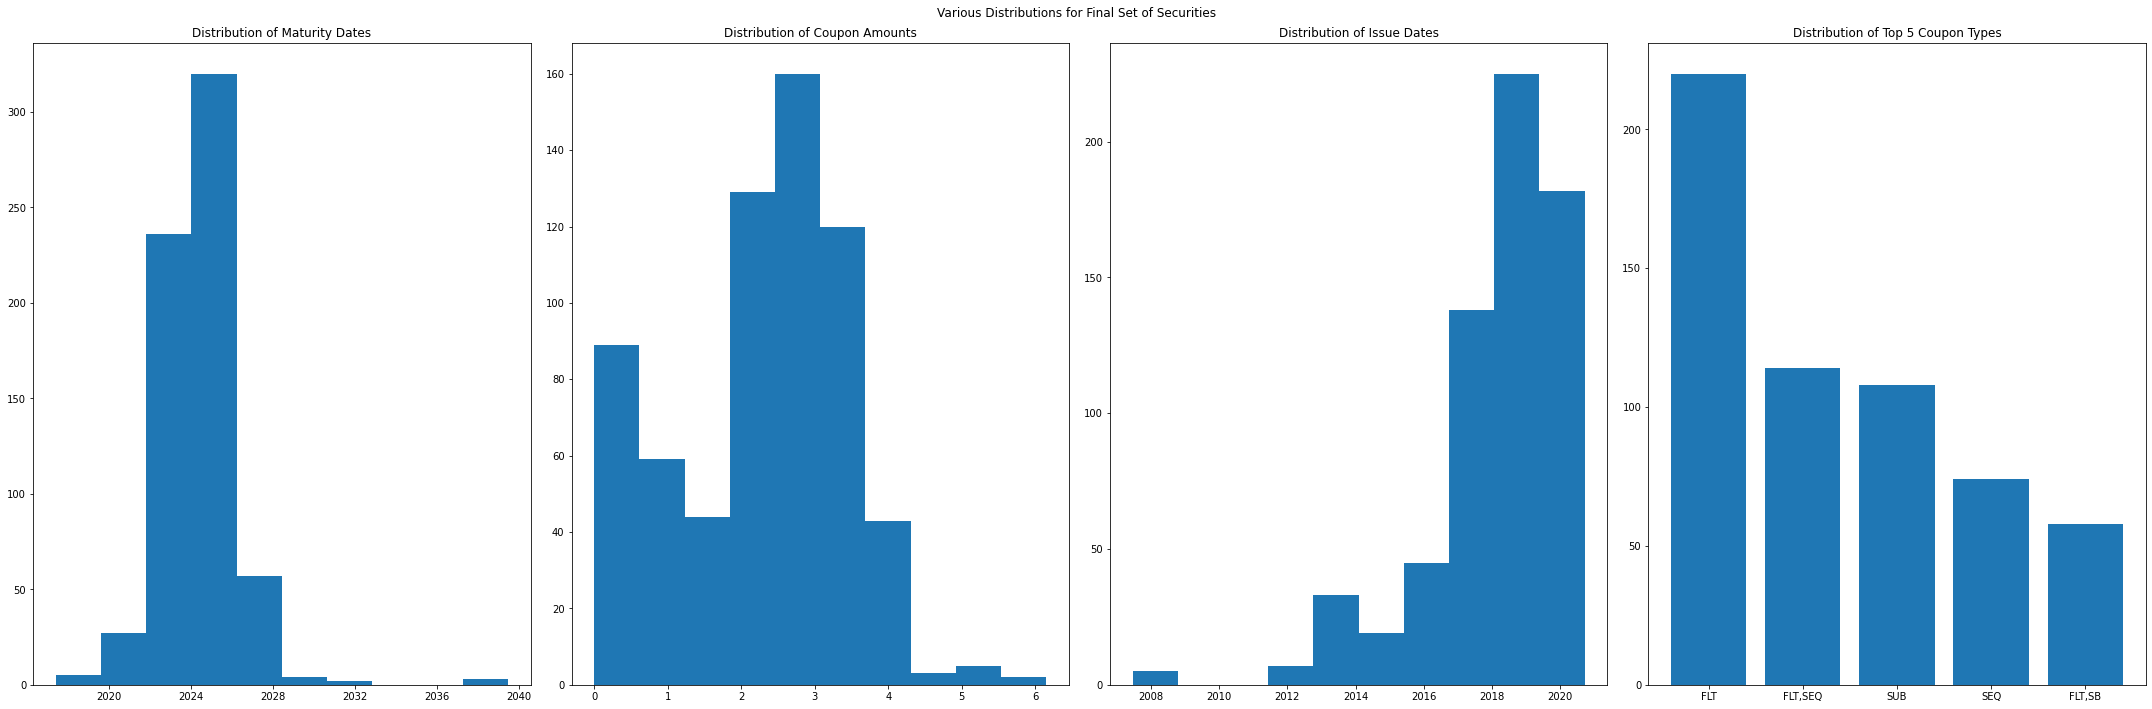

In [26]:
fig, axes=plt.subplots(ncols=4, figsize=(30,10))

axes[0].hist(df3['Maturity'])
axes[0].set_title('Distribution of Maturity Dates')


axes[1].hist(df3['Coupon'])
axes[1].set_title('Distribution of Coupon Amounts')


axes[2].hist(df3['Issued'])
axes[2].set_title('Distribution of Issue Dates')

axes[3].bar(df3['Type'].unique()[:5], df3['Type'].value_counts()[:5])
axes[3].set_title('Distribution of Top 5 Coupon Types')

fig.suptitle('Various Distributions for Final Set of Securities')
plt.tight_layout()


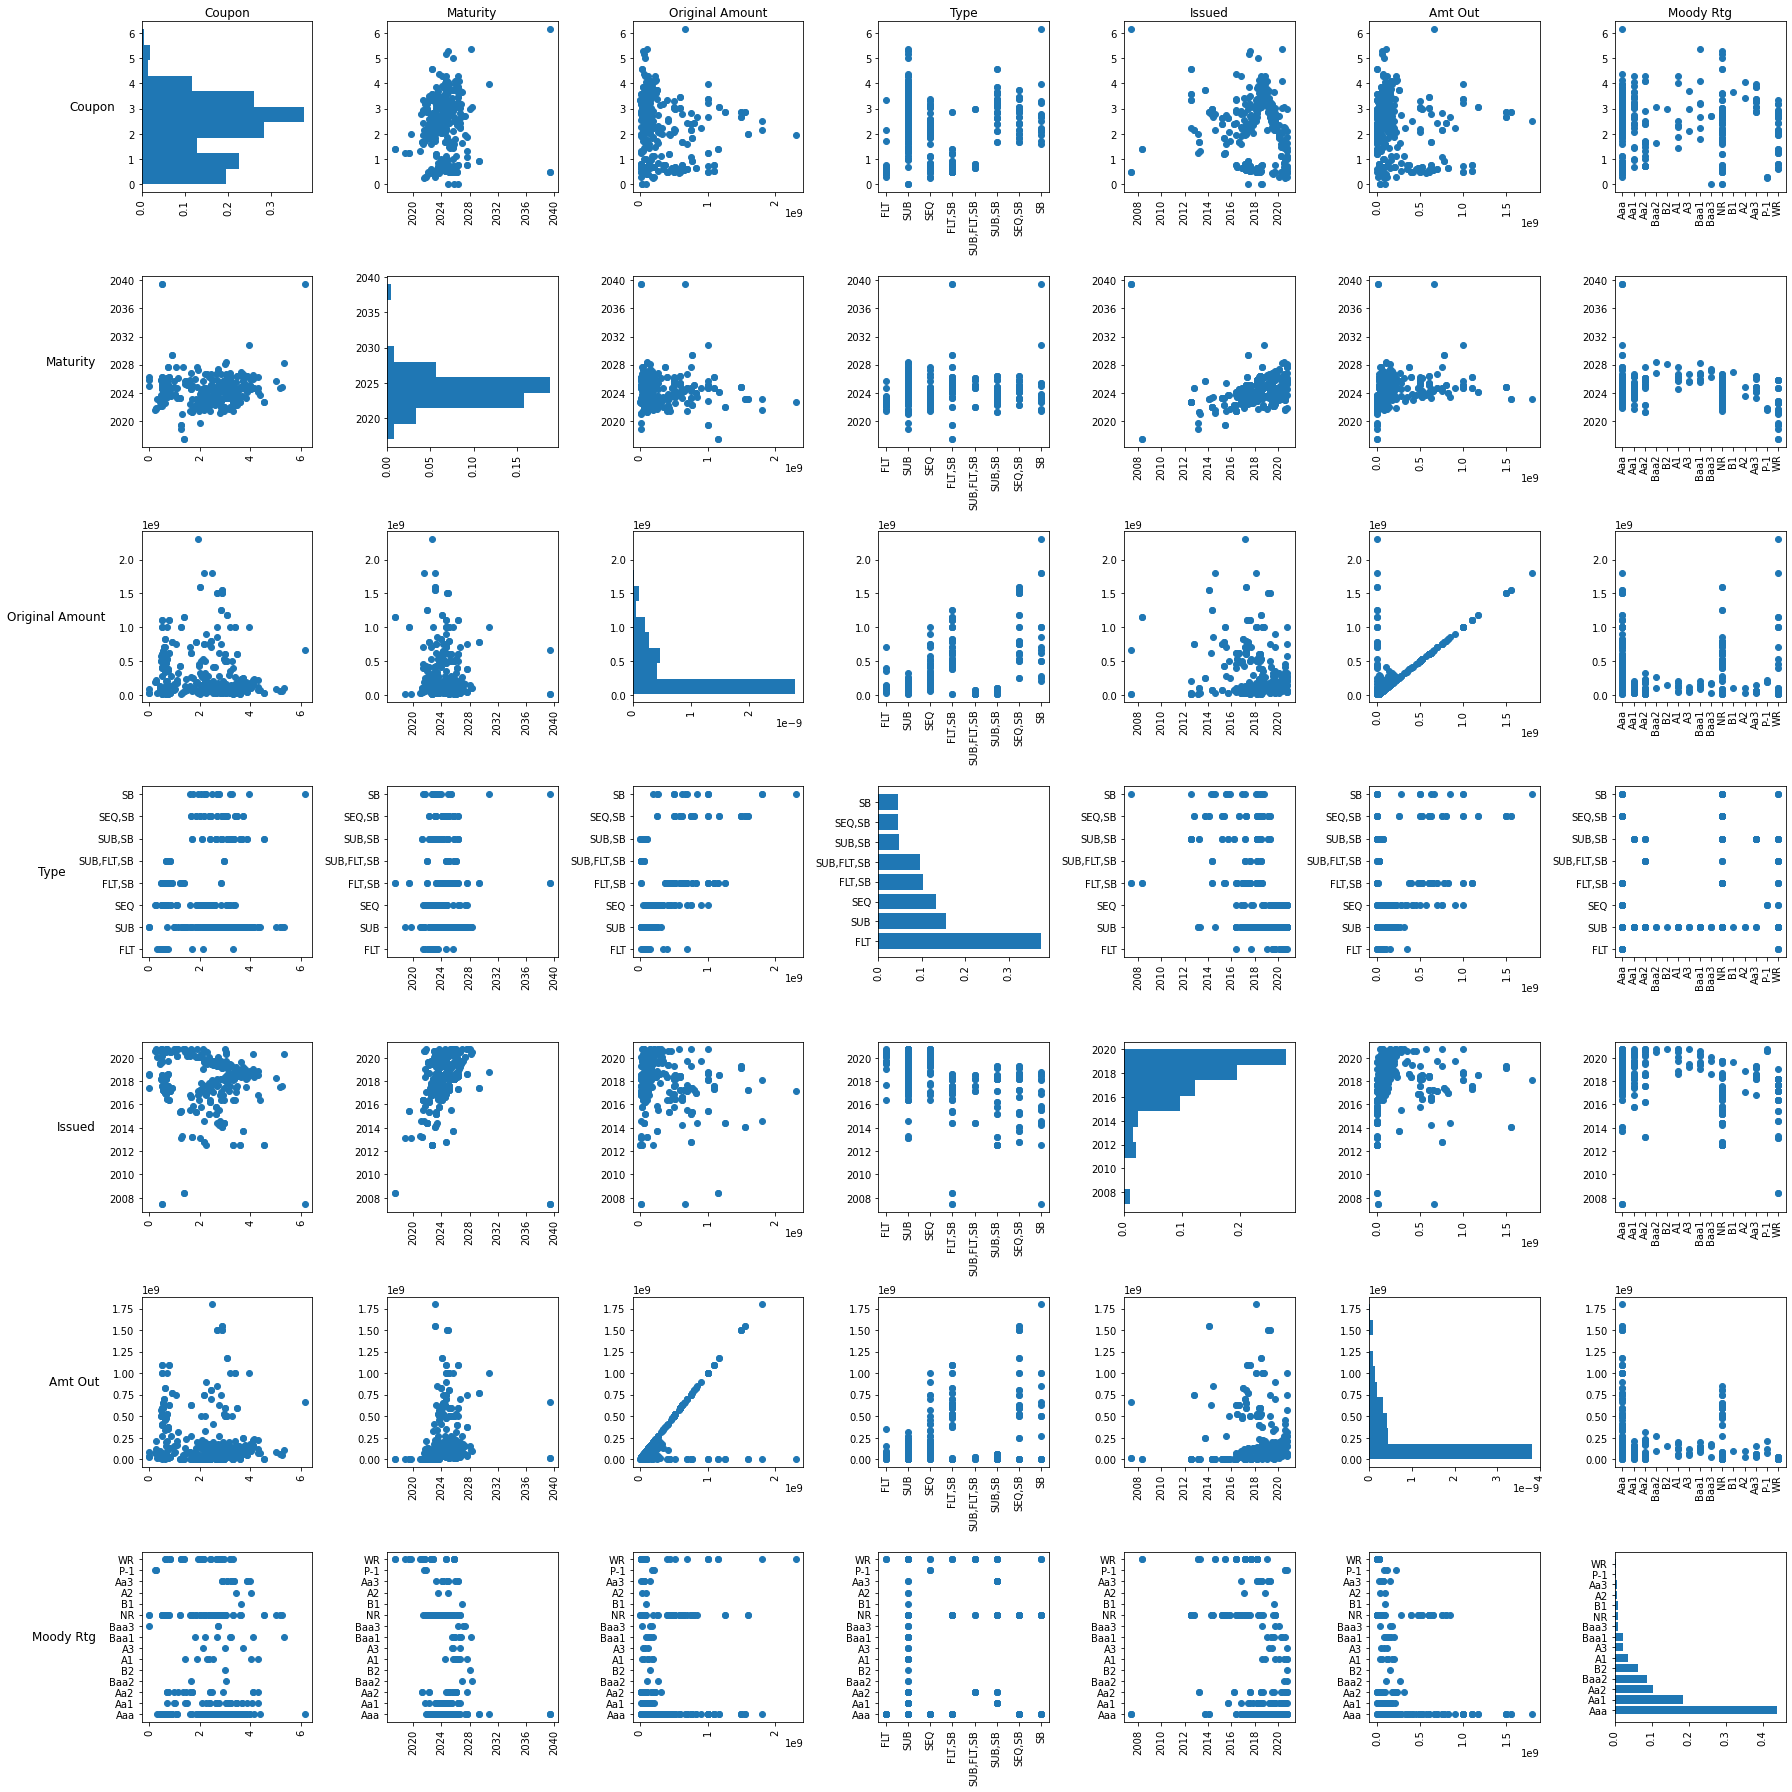

In [28]:
cols=['Coupon', 'Maturity', 'Original Amount', 'Type', 'Issued', 'Amt Out', 'Moody Rtg']

fig, axes = plt.subplots(ncols=len(cols), nrows=len(cols), figsize=(25,25))


for j,i in enumerate(cols):
    for l, k in enumerate(cols):
        if j==l:
            if type(df3[i][~df3['Moody Rtg'].isna()][0])==str:
                axes[j,l].barh(df3[i][~df3['Moody Rtg'].isna()].unique(), df3[i][~df3['Moody Rtg'].isna()].value_counts()/np.sum(df3[i][~df3['Moody Rtg'].isna()].value_counts()), linewidth=0)
            elif type(df3[i][~df3['Moody Rtg'].isna()][0])==pd.Timestamp:
                axes[j,l].hist(df3[i][~df3['Moody Rtg'].isna()].dt.year, orientation='horizontal', density=True)
            else:
                axes[j,l].hist(df3[i][~df3['Moody Rtg'].isna()], orientation='horizontal', density=True)

        else:
            axes[j,l].scatter(df3[k][~df3['Moody Rtg'].isna()], df3[i][~df3['Moody Rtg'].isna()])
                
        
        axes[j,l].tick_params(axis='x', labelrotation=90)
        axes[j,l].autoscale()
          
            

            
pad=5
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], cols):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
     
fig.tight_layout()


In [29]:
LAATTRUU: pd.DataFrame = pd.read_excel(data_directory + "/LAATTRUU.xlsx") # Auto ABS Index
LAATTRUU.set_index('Date', inplace=True)

LACCTRUU: pd.DataFrame = pd.read_excel(data_directory + "/LACCTRUU.xlsx") # Card ABS Index
LACCTRUU.set_index('Date', inplace=True)

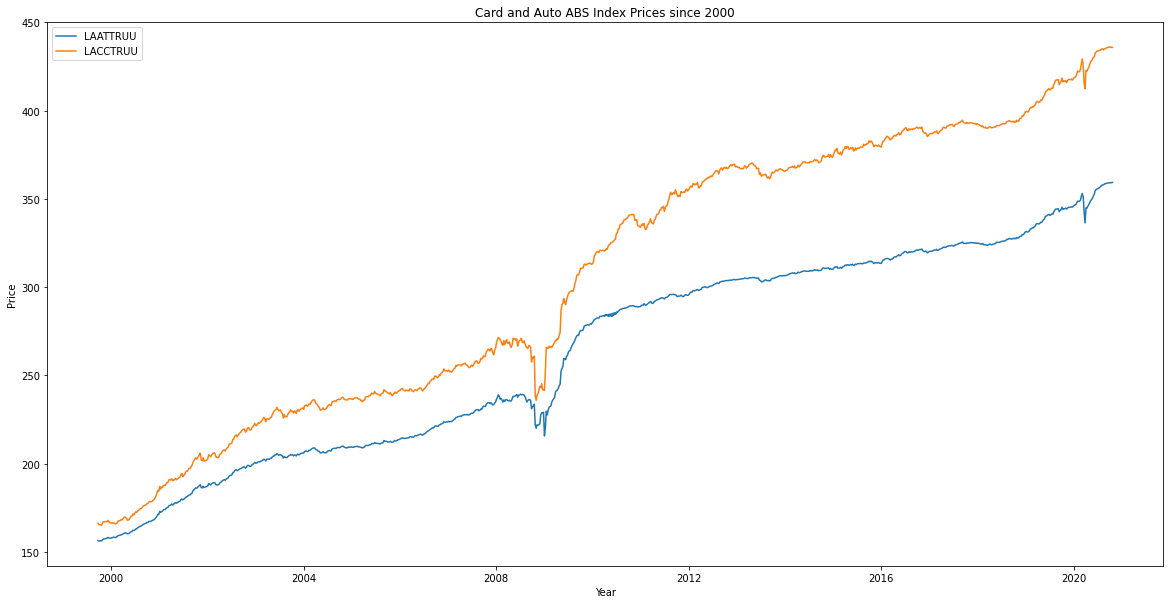

In [30]:
fig = plt.figure(figsize=(20,10))

plt.plot(LAATTRUU, label='LAATTRUU')
plt.plot(LACCTRUU, label='LACCTRUU')

plt.legend()

plt.ylabel('Price')
plt.xlabel('Year')

plt.title('Card and Auto ABS Index Prices since 2000')

_=plt.show()

In [31]:
traceCategories=['CARD', 'AUTO', 'CONSUMER']

traceIssuanceDFs: dict = {}
    
for i in traceCategories:
    df: pd.DataFrame = pd.read_excel(data_directory + f"/ABS TRACE ISSUANCE {i}.xlsx")
    df['Category']=i
    traceIssuanceDFs[f"{i}"] = df
    
    
traceIssuances: pd.DataFrame=pd.concat([traceIssuanceDFs[i] for i in traceIssuanceDFs])
traceIssuances.reset_index(inplace=True)
traceIssuances.drop('index', inplace=True, axis=1)


In [132]:
traceIssuances['Delinquency Rate 60+ Days'].replace(float("nan"), 0,inplace=True)
traceIssuances['Delinquency Rate 90+ Days'].replace(float("nan"), 0,inplace=True)

traceIssuances=traceIssuances[(traceIssuances['Issue Date']!="#N/A Field Not Applicable") & (traceIssuances['Issue Date'] !=  "#N/A Review")]
traceIssuances=traceIssuances[(traceIssuances['Maturity']!="#N/A Field Not Applicable") & (traceIssuances['Maturity'] !=  "#N/A Review")]
traceIssuances=traceIssuances[(traceIssuances['Next Call Date']!="#N/A Field Not Applicable") & (traceIssuances['Next Call Date'] !=  "#N/A Review")]
traceIssuances=traceIssuances[(traceIssuances['Next Coupon Date']!="#N/A Field Not Applicable") & (traceIssuances['Next Coupon Date'] !=  "#N/A Review")]

traceIssuances.dropna(subset=['Mid Price'], inplace=True)

traceIssuances['Issue Date']=pd.to_datetime(traceIssuances['Issue Date'])
traceIssuances['Maturity']=pd.to_datetime(traceIssuances['Maturity'])
traceIssuances['Next Call Date']=pd.to_datetime(traceIssuances['Next Call Date'])
traceIssuances['Next Call Date'].fillna(traceIssuances['Maturity'], inplace=True)

traceIssuances['Next Coupon Date']=pd.to_datetime(traceIssuances['Next Coupon Date'])

traceIssuances['isCallable']=traceIssuances['Next Call Date'].isna()
traceIssuances['isCallable'].replace(False, 1, inplace=True)
traceIssuances['isCallable'].replace(True, 0, inplace=True)

traceIssuances.to_excel(data_directory + '/traceIssuances.xlsx')

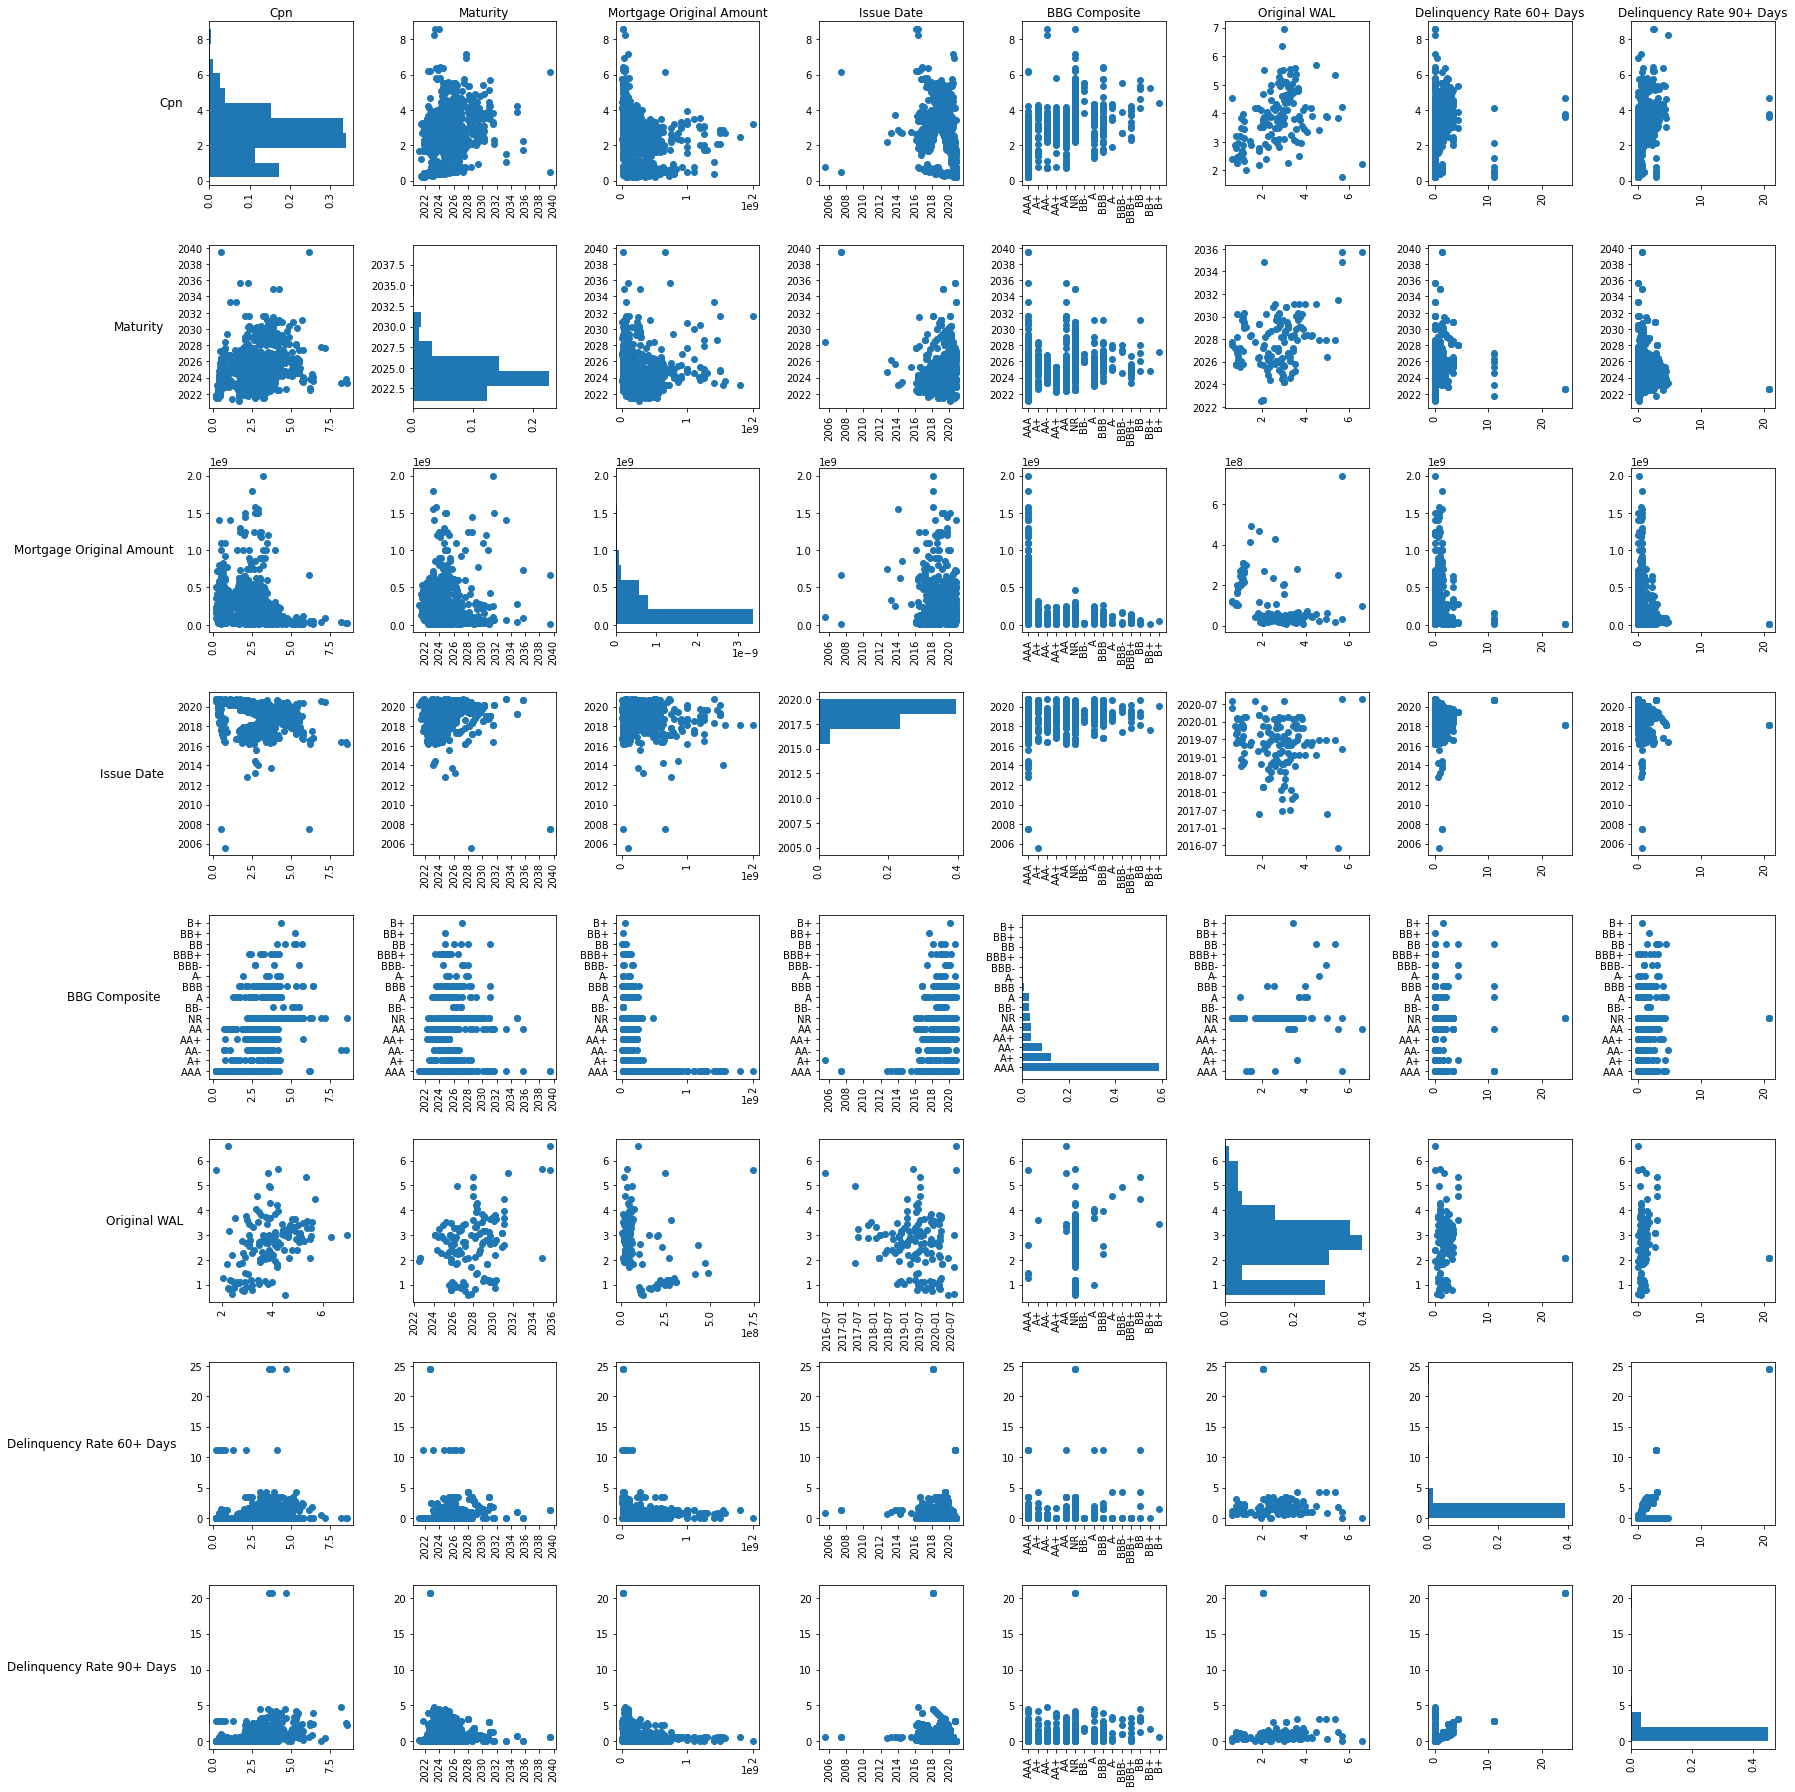

In [133]:
cols=['Cpn', 'Maturity', 'Mortgage Original Amount', 'Issue Date', 'BBG Composite', 'Original WAL','Delinquency Rate 60+ Days', 'Delinquency Rate 90+ Days']

fig, axes = plt.subplots(ncols=len(cols), nrows=len(cols), figsize=(25,25))


for j,i in enumerate(cols):
    for l, k in enumerate(cols):
        if j==l:
            if type(traceIssuances[i][0])==str or type(traceIssuances[i][0])==np.bool_:
                axes[j,l].barh(traceIssuances[i].unique(), traceIssuances[i].value_counts()/np.sum(traceIssuances[i].value_counts()), linewidth=0)
            elif type(traceIssuances[i][0])==pd.Timestamp:
                axes[j,l].hist(traceIssuances[i].dt.year, orientation='horizontal', density=True)
            else:
                axes[j,l].hist(traceIssuances[i], orientation='horizontal', density=True)
                

        else:
            axes[j,l].scatter(traceIssuances[k], traceIssuances[i])
                
        
        axes[j,l].tick_params(axis='x', labelrotation=90)
        axes[j,l].autoscale()
          
            

            
pad=5
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], cols):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
     
fig.tight_layout()

In [34]:
from sklearn.linear_model import LinearRegression

X=pd.get_dummies(traceIssuances[['Delinquency Rate 60+ Days', 'Delinquency Rate 90+ Days', 'BBG Composite', 'isCallable']])
y=traceIssuances['Cpn']

model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [35]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Delinquency Rate 60+ Days,-2.608489e-01
Delinquency Rate 90+ Days,3.917160e-01
isCallable,2.220446e-16
BBG Composite_A,-5.143444e-01
BBG Composite_A+,-7.944152e-01
BBG Composite_A-,-1.173402e-01
BBG Composite_AA,-8.347276e-01
BBG Composite_AA+,-5.940816e-01
BBG Composite_AA-,-5.291232e-01
BBG Composite_AAA,-1.396113e+00


<AxesSubplot:xlabel='Cpn'>

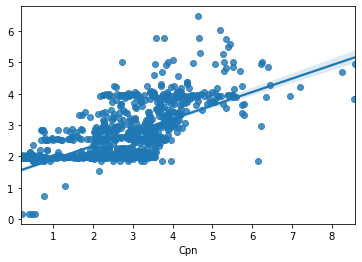

In [36]:
import seaborn as sns

t=model.predict(X)

sns.regplot(x=y, y=t, data=X)

array([[ 6.,  0.,  1.],
       [ 6.,  0.,  1.],
       [ 6.,  0.,  1.],
       ...,
       [14.,  0.,  2.],
       [14.,  0.,  2.],
       [14.,  0.,  2.]])

In [243]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

X_Cols=['Cpn', 'Amt Out', 'BBG Composite', 'Current WAL', 'Day Count',
       'Delinquency Rate 60+ Days', 'Delinquency Rate 90+ Days', 'Issue Date', 'Maturity', 'Mid Price', 'Mortgage Original Amount',
       'Next Call Date', 'Next Coupon Date',
       'Price at Issue', 'Category',
       'isCallable']

X=traceIssuances.copy()[X_Cols]
X.dropna(inplace=True)

encoder=OrdinalEncoder()
X_ordinal=encoder.fit_transform(X[['BBG Composite', 'Day Count', 'Category']])

X_idx=X.index

X['Next Call Date']=X['Next Call Date'].map(dt.datetime.toordinal)
X['Next Coupon Date']=X['Next Coupon Date'].map(dt.datetime.toordinal)
X['Issue Date']=X['Issue Date'].map(dt.datetime.toordinal)
X['Maturity']=X['Maturity'].map(dt.datetime.toordinal)

X[['BBG Composite', 'Day Count', 'Category']]=X_ordinal

feature_columns=X.columns
scaler=MinMaxScaler()
X=scaler.fit_transform(X)


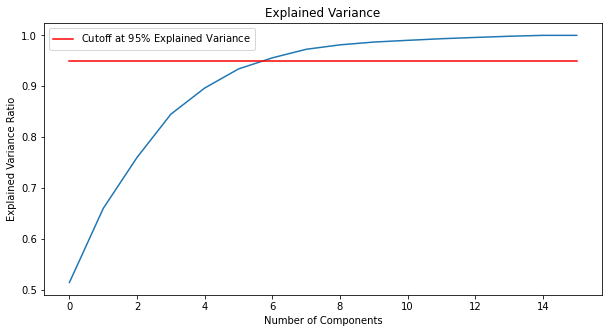

In [244]:
model=PCA()
model.fit(X)

explained_variance=model.explained_variance_ratio_

figure=plt.figure(figsize=(10,5))

plt.plot(range(len(explained_variance)), np.cumsum(explained_variance))
plt.plot(range(len(explained_variance)), [0.95 for i in range(len(explained_variance))], label='Cutoff at $95\%$ Explained Variance', color='r')

plt.title('Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()

plt.show()

In [245]:
model=PCA(n_components=10)
model.fit(X)

componentMap=pd.DataFrame(model.components_, columns=feature_columns, index=[f'PC-{i+1}' for i in range(10)])
componentMap

,Cpn,Amt Out,BBG Composite,Current WAL,Day Count,Delinquency Rate 60+ Days,Delinquency Rate 90+ Days,Issue Date,Maturity,Mid Price,Mortgage Original Amount,Next Call Date,Next Coupon Date,Price at Issue,Category,isCallable
PC-1,0.158524,0.004436,0.478470,0.008428,-0.023554,0.075015,0.039073,-0.014941,0.171843,-0.007554,-0.001839,0.006268,0.007125,-0.007434,0.841533,0.0
PC-2,-0.400802,0.442996,-0.453292,0.070724,0.289788,0.011956,-0.050139,0.018417,0.086502,-0.013936,0.436809,0.204970,0.042639,0.011842,0.321268,0.0
PC-3,0.377890,-0.151013,-0.696304,0.096299,-0.409147,0.024723,0.045971,-0.092656,0.225631,0.065093,-0.194700,0.000525,0.018561,-0.008537,0.260957,-0.0
PC-4,0.329141,0.499888,0.202999,0.030340,-0.539640,-0.039049,0.003620,-0.076676,0.033683,0.068468,0.504746,-0.003075,0.025133,-0.013924,-0.198986,-0.0
PC-5,-0.184804,-0.040278,0.176347,0.477006,-0.092515,-0.076193,-0.100140,0.233042,0.655923,0.084578,-0.138864,0.363070,0.030377,-0.005231,-0.193522,0.0
PC-6,0.521573,0.075558,0.020283,0.192125,0.582598,-0.011659,0.114158,-0.495468,0.133776,0.105786,0.029576,0.170989,0.088762,-0.029705,-0.137448,-0.0
PC-7,-0.091227,0.030860,0.014551,0.074295,-0.060635,0.726128,0.651952,0.058395,-0.027596,-0.002589,-0.015026,0.132564,-0.003546,0.012141,-0.082925,-0.0
PC-8,-0.448399,-0.103482,0.082923,0.101499,-0.298310,0.013641,-0.055820,-0.797730,-0.033568,-0.086741,-0.068187,0.062803,0.156104,0.019336,0.020019,0.0
PC-9,0.107800,-0.115236,0.016216,0.234669,-0.106499,-0.090402,-0.069946,0.155221,-0.598230,0.100974,-0.021625,0.635200,0.298699,-0.030671,0.095301,0.0
PC-10,-0.017888,0.010396,-0.000171,-0.053713,0.048759,0.124340,-0.068578,0.120645,0.113516,0.144361,-0.000287,-0.324660,0.905259,-0.014133,-0.027699,0.0


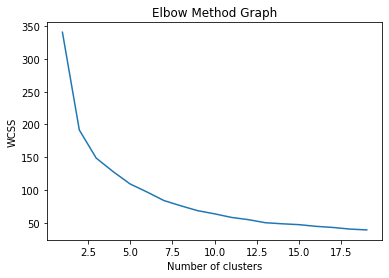

In [247]:
err: list = []

for i in range(1,20): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )

    kmeans.fit(X)

    err.append(kmeans.inertia_)

plt.plot(range(1,20),err)
plt.title('Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

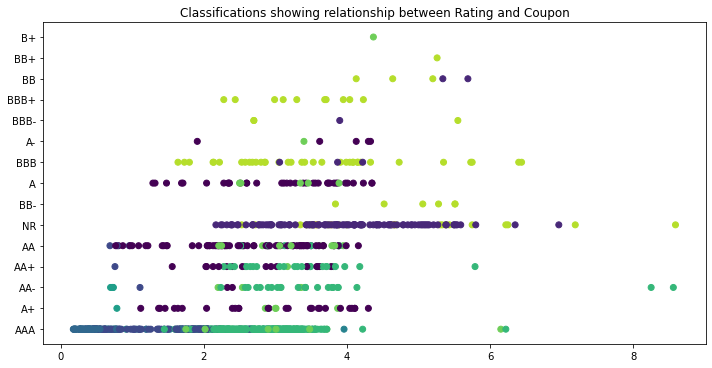

In [289]:
kmodel=KMeans(n_clusters=10)

y_pred=kmodel.fit_predict(X)

fig=plt.figure(figsize=(10,5))

plt.scatter(traceIssuances.loc[X_idx]['Cpn'], traceIssuances.loc[X_idx]['BBG Composite'], c=y_pred)
plt.tight_layout()

plt.title('Classifications showing relationship between Rating and Coupon')
_=plt.show()

## Question Answered (?)
From this, we can clearly see that there isn't a hardline from the data available that distinguishes AAA rated bonds from BB+ rated bonds since the groupings show multiple classes across ratings. This is interesting, and possibly indicates some sort of mispricing. It's also clear that the category (CARD, AUTO, CONSUMER) plays a role in explaining a bond, which means we can potentially expect the 3 categories of bonds to be priced differently for different reasons. 

## Cluster Attributes

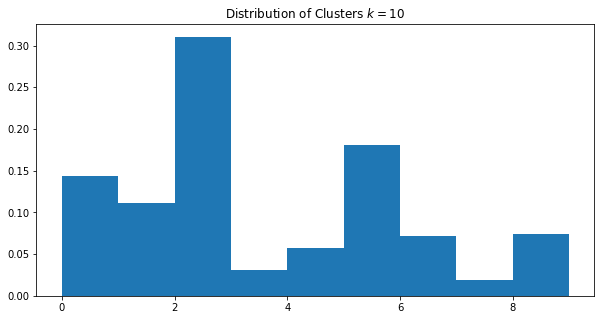

In [250]:
vals, counts=np.unique(y_pred, return_counts=True)

fig=plt.figure(figsize=(10,5))

plt.hist(y_pred, bins=max(vals), density=True)
plt.title('Distribution of Clusters $k=10$')
_=plt.show()

In [251]:
X_Cols.append('CUSIP')

sampleSelection=traceIssuances[X_Cols].copy()
sampleSelection.dropna(inplace=True)
sampleSelection.reset_index(inplace=True)
sampleSelection.drop('index', inplace=True, axis=1)
sampleSelection['cluster']=y_pred

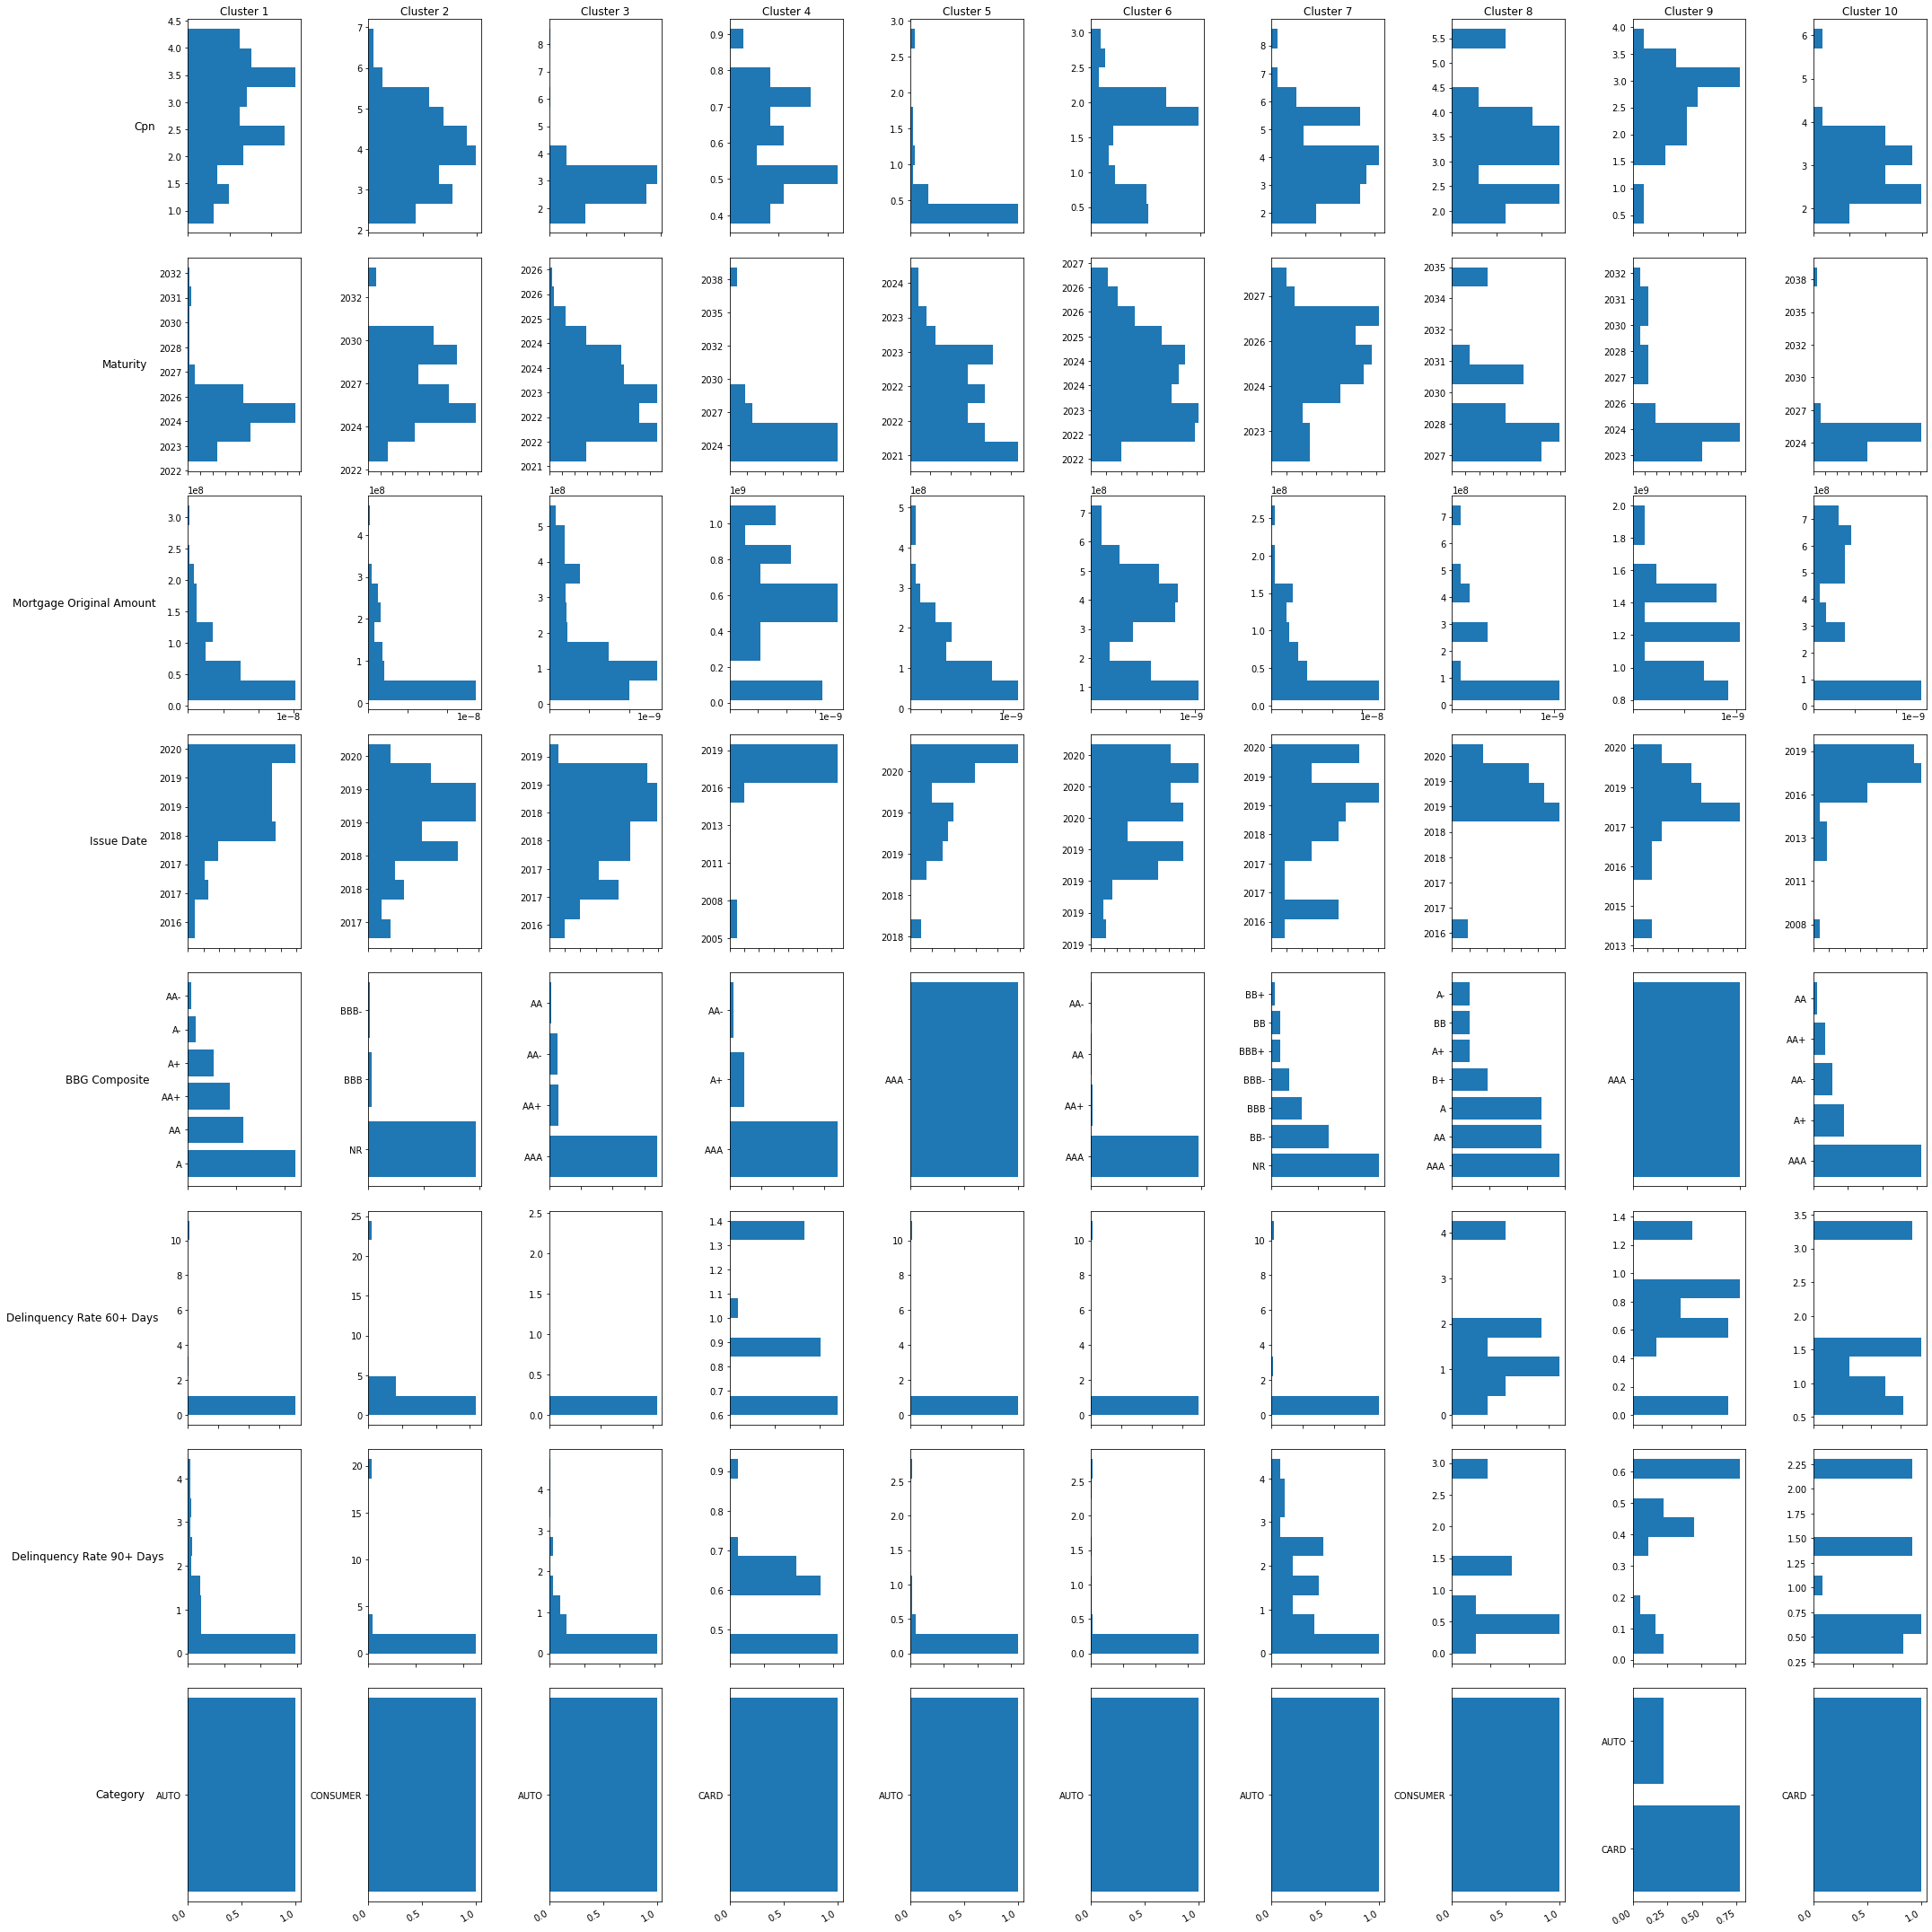

In [280]:
cols=['Cpn', 'Maturity', 'Mortgage Original Amount', 'Issue Date', 'BBG Composite','Delinquency Rate 60+ Days', 'Delinquency Rate 90+ Days', 'Category']
rows=vals
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y')


fig, axes = plt.subplots(ncols=len(vals), nrows=len(cols), figsize=(30,30))


for j,i in enumerate(cols):
    for l, k in enumerate(vals):
        sample=sampleSelection[sampleSelection['cluster']==k][i].iloc[0]
        
        if type(sample)==str or type(sample)==np.bool_:
            axes[j,l].barh(sampleSelection[sampleSelection['cluster']==k][i].unique(), sampleSelection[sampleSelection['cluster']==k][i].value_counts()/np.sum(sampleSelection[sampleSelection['cluster']==k][i].value_counts()), linewidth=0)
        elif type(sample)==pd.Timestamp:
            axes[j,l].hist(sampleSelection[sampleSelection['cluster']==k][i], density=True, orientation='horizontal')
            axes[j,l].yaxis.set_major_formatter(myFmt)
        else:
            axes[j,l].hist(sampleSelection[sampleSelection['cluster']==k][i], density=True, orientation='horizontal')

        axes[j,l].tick_params(axis='x', labelrotation=90)
        axes[j,l].autoscale()

        
            
pad=5
for ax, col in zip(axes[0], vals):
    ax.annotate("Cluster " + str(col+1), xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], cols):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
fig.autofmt_xdate()
fig.tight_layout()

## Choosing Individual Bonds

In [292]:
from scipy.cluster.vq import vq
closest, distances = vq(kmodel.cluster_centers_, X)

In [306]:
np.unique(sampleSelection[sampleSelection['Issue Date'].dt.year < 2017]['cluster'])

array([0, 2, 3, 6, 7, 8, 9])

In [314]:
closestCUSIPs: list = []
randomCUSIPs: list = []
    
np.random.seed(seed=0)
for i in vals:
    choice=np.random.choice(sampleSelection[(sampleSelection['cluster']==i) & (sampleSelection['Issue Date'].dt.year == min(sampleSelection[sampleSelection['cluster']==i]['Issue Date'].dt.year))]['CUSIP'], )
    randomCUSIPs.append(choice)
    
for i in closest:
    choice=sampleSelection.iloc[i]['CUSIP']
    closestCUSIPs.append(choice)


In [315]:
traceIssuances[traceIssuances['CUSIP'].isin(randomCUSIPs)]

,Amt Out,BBG Composite,CUSIP,Cpn,Current WAL,Day Count,Delinquency Rate 60+ Days,Delinquency Rate 90+ Days,Issue Date,Issuer Name,...,Mortgage Original Amount,Next Call Date,Next Coupon Date,Original Maximum Loan Size,Price at Issue,Security Name,Ticker,Category,Original WAL,isCallable
23,8.500000e+08,AAA,17305EFR1,2.68000,0.6028,30/360(104),1.37,0.640000,2014-06-10,Citibank Credit Card Issuance Trust,...,850000000,2023-06-07,2020-12-07,NaN,99.956,CCCIT 2014-A5 A5,CCCIT,CARD,NaN,1.0
49,6.650000e+08,AAA,17305EDT9,6.15000,16.6250,30/360(104),1.37,0.640000,2007-06-15,Citibank Credit Card Issuance Trust,...,665000000,2039-06-15,2020-12-15,NaN,99.755,CCCIT 2007-A3 A3,CCCIT,CARD,NaN,1.0
74,1.000000e+08,A+,14041NCG4,0.78688,4.7083,ACT/360(102),0.86,0.624393,2005-08-04,Capital One Multi-Asset Execution Trust,...,100000000,2028-05-15,2021-01-15,NaN,100.000,COMET 2005-B3 B3,COMET,CARD,NaN,1.0
279,1.300000e+08,AAA,65478DAE7,2.89000,0.9398,ISMA 30/360(131),0.00,0.070000,2018-02-28,Nissan Auto Receivables 2018-A Owner Trust,...,130000000,2022-03-15,2020-11-15,1.114468e+09,99.976,NAROT 2018-A A4,NAROT,AUTO,NaN,1.0
568,3.787000e+07,A+,74113MAF7,3.91000,0.3162,30/360(104),2.40,2.400000,2016-10-27,Prestige Auto Receivables Trust 2016-2,...,37870000,2021-03-15,2020-11-15,2.041523e+08,99.968,PART 2016-2A D,PART,AUTO,NaN,1.0
863,7.338000e+07,AAA,36258MAE4,1.76000,2.1431,30/360(104),0.00,0.030000,2019-10-16,GM Financial Consumer Automobile Receivables T...,...,73380000,2023-01-16,2020-11-16,1.039586e+09,99.974,GMCAR 2019-4 A4,GMCAR,AUTO,NaN,1.0
929,1.680000e+07,AAA,872295AF7,2.51000,0.0417,30/360(104),0.00,0.000000,2016-09-22,TCF Auto Receivables Owner Trust 2016-1,...,16800000,2020-11-15,2020-11-15,5.016207e+08,99.968,TCFAT 2016-1A C,TCFAT,AUTO,NaN,1.0
1029,1.656000e+07,NR,872295AG5,3.50000,0.0417,30/360(104),0.00,0.000000,2016-09-22,TCF Auto Receivables Owner Trust 2016-1,...,16560000,2020-11-15,2020-11-15,5.016207e+08,99.978,TCFAT 2016-1A D,TCFAT,AUTO,NaN,1.0
1068,2.487000e+08,AA,68268HAA4,3.83000,0.5500,30/360(104),1.76,1.296369,2016-06-07,OneMain Financial Issuance Trust 2016-3,...,248700000,2021-05-18,2020-11-18,NaN,99.503,OMFIT 2016-3A A,OMFIT,CONSUMER,5.49,1.0
1209,2.489808e+07,NR,91678RAC4,5.59000,0.3412,30/360(104),1.89,0.870000,2017-11-21,Upstart Securitization Trust 2017-2,...,42860000,2021-03-20,2020-11-20,NaN,99.999,UPST 2017-2 C,UPST,CONSUMER,3.51,1.0


In [310]:
traceIssuances[traceIssuances['CUSIP'].isin(closestCUSIPs)]

,Amt Out,BBG Composite,CUSIP,Cpn,Current WAL,Day Count,Delinquency Rate 60+ Days,Delinquency Rate 90+ Days,Issue Date,Issuer Name,...,Mortgage Original Amount,Next Call Date,Next Coupon Date,Original Maximum Loan Size,Price at Issue,Security Name,Ticker,Category,Original WAL,isCallable
2,1.250000e+09,AAA,254683CK9,3.04000,1.2083,30/360(104),0.89,0.61000,2019-02-01,Discover Card Execution Note Trust,...,1250000000,2024-07-15,2020-11-15,NaN,99.998,DCENT 2019-A1 A1,DCENT,CARD,NaN,1.0
66,5.000000e+08,AAA,02582JHS2,0.46838,2.3750,ACT/360(102),0.60,0.44696,2018-03-21,American Express Credit Account Master Trust,...,500000000,2025-10-15,2020-11-16,NaN,100.000,AMXCA 2018-3 A,AMXCA,CARD,NaN,1.0
124,7.191781e+07,AA,87165LBV2,2.82000,1.9583,30/360(104),1.59,1.33000,2017-11-02,Synchrony Credit Card Master Note Trust,...,71917808,2025-10-15,2020-11-15,NaN,99.998,SYNCT 2017-2 B,SYNCT,CARD,NaN,1.0
278,1.126300e+08,AAA,14314AAD1,2.64000,1.1216,30/360(104),0.00,0.26330,2018-01-24,CarMax Auto Owner Trust 2018-1,...,112630000,2022-02-15,2020-11-15,1.356784e+09,99.984,CARMX 2018-1 A4,CARMX,AUTO,NaN,1.0
300,2.813800e+08,AAA,36258VAD6,1.49000,1.6115,30/360(104),0.00,0.01000,2020-04-22,GM Financial Consumer Automobile Receivables T...,...,281380000,2023-07-16,2020-11-16,8.414444e+08,99.994,GMCAR 2020-2 A3,GMCAR,AUTO,NaN,1.0
448,3.832000e+07,AA,14316LAE3,3.01000,2.2917,30/360(104),0.00,0.22350,2019-04-17,Carmax Auto Owner Trust 2019-2,...,38320000,2023-02-15,2020-11-15,1.368421e+09,99.974,CARMX 2019-2 B,CARMX,AUTO,NaN,1.0
705,2.386000e+07,BBB,33844RAG6,4.08000,2.2610,30/360(104),0.00,1.69000,2019-02-14,Flagship Credit Auto Trust 2019-1,...,23860000,2023-08-15,2020-11-15,2.097832e+08,99.996,FCAT 2019-1 D,FCAT,AUTO,NaN,1.0
763,4.092691e+07,AAA,34531KAC6,0.33838,0.2784,ACT/360(102),0.00,0.05000,2019-11-22,Ford Credit Auto Owner Trust 2019-C,...,75000000,2023-04-15,2020-11-16,1.424799e+09,100.000,FORDO 2019-C A2B,FORDO,AUTO,NaN,1.0
1126,1.359000e+07,NR,74614NAC6,3.78000,0.0417,30/360(104),24.41,20.69000,2018-02-23,Purchasing Power Funding 2018-A LLC,...,13590000,2020-11-15,2020-11-15,NaN,99.991,PPWR 2018-A C,PPWR,CONSUMER,2.06,1.0
1212,2.066000e+07,NR,50202AAB4,3.52000,1.2558,30/360(104),0.87,0.50240,2019-11-13,LL ABS Trust 2019-1,...,20660000,2023-01-15,2020-11-15,NaN,99.985,LLEND 2019-1A B,LLEND,CONSUMER,2.03,1.0


In [654]:
CUSIPs=closestCUSIPs+randomCUSIPs

cardDF: pd.DataFrame = pd.DataFrame()
autoDF: pd.DataFrame = pd.DataFrame()
consumerDF: pd.DataFrame = pd.DataFrame()
    
for i in CUSIPs:
    df=pd.read_excel(data_directory + f"/{i}_PDI_Collateral.xlsx", skiprows=2)
    df['Name']=traceIssuances[traceIssuances['CUSIP']==i]['Security Name'].values[0]
    
    if traceIssuances[traceIssuances['CUSIP']==i]['Category'].values[0]=='CARD':
        cardDF=pd.concat([cardDF, df])
        
    elif traceIssuances[traceIssuances['CUSIP']==i]['Category'].values[0]=='AUTO':
        autoDF=pd.concat([autoDF, df])
    else:
        consumerDF=pd.concat([consumerDF, df])
        
cardDF.set_index('Date', inplace=True)
cardDF.index=pd.to_datetime(cardDF.index)
cardDF.index=cardDF.index.to_period('M')
cardDF.reset_index(inplace=True)
cardDF.set_index(['Name', 'Date'], inplace=True)

autoDF.set_index('Date', inplace=True)
autoDF.index=pd.to_datetime(autoDF.index)
autoDF.index=autoDF.index.to_period('M')
autoDF.reset_index(inplace=True)
autoDF.set_index(['Name', 'Date'], inplace=True)

consumerDF.set_index('Date', inplace=True)
consumerDF.index=pd.to_datetime(consumerDF.index)
consumerDF.index=consumerDF.index.to_period('M')
consumerDF.reset_index(inplace=True)
consumerDF.set_index(['Name', 'Date'], inplace=True)

In [647]:
cardDF

3M     1M  Mth Pay Rate  Port Yld  Chg Offs  \
Name             Date                                                       
DCENT 2019-A1 A1 2020-10  12.990  13.14         24.28     18.42      1.98   
                 2020-09  12.790  12.72         23.97     18.30      2.27   
                 2020-08  12.793  13.11         24.28     18.57      2.09   
                 2020-07  12.270  12.54         22.11     18.03      2.13   
                 2020-06  12.447  12.73         21.25     18.55      2.53   
...                          ...    ...           ...       ...       ...   
CCCIT 2007-A3 A3 2001-01     NaN    NaN         18.04       NaN      4.00   
                 2000-12     NaN    NaN         18.95       NaN      3.30   
                 2000-11     NaN    NaN           NaN       NaN       NaN   
                 2000-10     NaN    NaN           NaN       NaN       NaN   
                 2000-09     NaN    NaN         21.31       NaN      3.90   

                            30    60   90+  Seller Int  
Name             Date                                   
DCENT 2019-A1 A1 2020-10  0.39  0.28  0.61         NaN  
                 2020-09  0.37  0.27  0.65         NaN  
                 2020-08  0.36  0.28  0.72         NaN  
                 2020-07  0.38  0.32  0.74         NaN  
                 2020-06  0.42  0.34  0.77         NaN  
...                        ...   ...   ...         ...  
CCCIT 2007-A3 A3 2001-01  4.74  2.35  1.29         NaN  
                 2000-12  5.03  2.05  1.35         NaN  
                 2000-11  5.15  2.21  1.22         NaN  
                 2000-10  4.90  2.03  1.25         NaN  
                 2000-09   NaN   NaN   NaN         NaN  

[1352 rows x 9 columns]

In [648]:
cardDF.rename(columns={'3M':'3m_Excess_Spread', '1M':'1m_Excess_Spread'}, inplace=True)

cardDF.head(5)

3m_Excess_Spread  1m_Excess_Spread  Mth Pay Rate  \
Name             Date                                                        
DCENT 2019-A1 A1 2020-10            12.990             13.14         24.28   
                 2020-09            12.790             12.72         23.97   
                 2020-08            12.793             13.11         24.28   
                 2020-07            12.270             12.54         22.11   
                 2020-06            12.447             12.73         21.25   

                          Port Yld  Chg Offs    30    60   90+  Seller Int  
Name             Date                                                       
DCENT 2019-A1 A1 2020-10     18.42      1.98  0.39  0.28  0.61         NaN  
                 2020-09     18.30      2.27  0.37  0.27  0.65         NaN  
                 2020-08     18.57      2.09  0.36  0.28  0.72         NaN  
                 2020-07     18.03      2.13  0.38  0.32  0.74         NaN  
                 2020-06     18.55      2.53  0.42  0.34  0.77         NaN

In [649]:
autoDF.head(5)

WAC  WAM  WALA    Balance   Principal  Net Interest
Name           Date                                                          
CARMX 2019-2 B 2020-10  8.700   46    23  742381049  28887669.0           NaN
               2020-09  8.690   47    22  771268719  29288544.0           NaN
               2020-08  8.678   48    21  800557263  32219751.0           NaN
               2020-07  8.665   49    20  832777015  30050982.0           NaN
               2020-06  8.650   50    19  862827997  30647074.0           NaN

In [650]:
consumerDF.head(5)

WAC   WAM  WALA      Balance  Principal  \
Name            Date                                                  
LLEND 2019-1A B 2020-10  21.109  48.0  20.0   97062298.0        NaN   
                2020-09  21.107  48.0  19.0  102545285.0        NaN   
                2020-08  21.103  48.0  18.0  108744381.0        NaN   
                2020-07  21.100  48.0  17.0  115197263.0        NaN   
                2020-06  21.099  47.0  16.0  121854981.0        NaN   

                         Net Interest  
Name            Date                   
LLEND 2019-1A B 2020-10           NaN  
                2020-09           NaN  
                2020-08           NaN  
                2020-07           NaN  
                2020-06           NaN

In [651]:
prices=pd.read_excel(data_directory + "/individual_bond_prices.xlsx")
prices.set_index('Date', inplace=True)
prices.head(5)

,DCENT 2019-A1 A1,AMXCA 2018-3 A,SYNCT 2017-2 B,CARMX 2018-1 A4,GMCAR 2020-2 A3,CARMX 2019-2 B,FCAT 2019-1 D,FORDO 2019-C A2B,PPWR 2018-A C,LLEND 2019-1A B,CCCIT 2014-A5 A5,CCCIT 2007-A3 A3,COMET 2005-B3 B3,NAROT 2018-A A4,PART 2016-2A D,GMCAR 2019-4 A4,TCFAT 2016-1A C,TCFAT 2016-1A D,OMFIT 2016-3A A,UPST 2017-2 C
Date,,,,,,,,,,,,,,,,,,,,
2020-10-21,103.453125,100.152344,102.539062,102.667969,102.007812,105.339844,105.363281,100.035156,100.000000,101.242188,101.527344,144.214844,96.894531,102.546875,101.093750,102.976562,100.121094,100.183594,101.546875,100.964844
2020-10-16,103.460938,100.152344,102.558594,102.691406,101.968750,105.250000,105.480469,100.027344,100.000000,100.714844,101.542969,145.722656,97.136719,102.562500,101.082031,103.019531,100.000000,100.000000,101.457031,101.035156
2020-10-09,103.500000,100.156250,102.441406,102.722656,101.941406,104.757812,105.425781,100.031250,100.003906,100.140625,101.574219,145.183594,96.976562,102.582031,101.140625,102.984375,100.007812,100.007812,101.511719,101.035156
2020-10-02,103.566406,100.156250,102.535156,102.792969,101.988281,104.824219,105.273438,100.042969,100.011719,99.750000,101.628906,145.835938,97.125000,102.695312,101.175781,103.046875,100.050781,100.074219,101.675781,100.855469
2020-09-25,103.593750,100.199219,102.546875,102.839844,102.007812,105.171875,105.363281,100.046875,100.019531,99.679688,101.679688,146.574219,97.160156,102.738281,101.246094,103.035156,100.089844,100.125000,101.769531,100.863281


In [664]:
for i in prices.columns:

    df=pd.DataFrame(prices[i].dropna().dropna().resample('m').mean())
    df['Upper_Price']=prices[i].dropna().dropna().resample('m').max()
    df['Lower_Price']=prices[i].dropna().dropna().resample('m').min()
    df['Name']=df.columns[0]
    df.rename(columns={f'{i}':'Price'}, inplace=True)
    df.index=df.index.to_period('M')
    df.reset_index(inplace=True)
    df.set_index(['Name', 'Date'], inplace=True)

    if traceIssuances[traceIssuances['Security Name']==i]['Category'].values[0]=='CARD':
        cardDF=cardDF.combine_first(df)
        
    elif traceIssuances[traceIssuances['Security Name']==i]['Category'].values[0]=='AUTO':
        autoDF=autoDF.combine_first(df)
    else:
        consumerDF=consumerDF.combine_first(df)

In [665]:
cardDF.loc['AMXCA 2018-3 A']

,30,60,1M,3M,90+,Chg Offs,Lower_Price,Mth Pay Rate,Port Yld,Price,Seller Int,Upper_Price
Date,,,,,,,,,,,,
1996-05,1.920,0.810,NaN,NaN,1.030,5.35,NaN,10.30,NaN,NaN,NaN,NaN
1996-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06,0.335,0.226,18.03,18.297,0.567,2.11,100.109375,29.66,22.93,100.172852,NaN,100.203125
2020-07,0.306,0.238,19.49,18.553,0.531,1.84,100.097656,33.47,24.89,100.103516,NaN,100.109375
2020-08,0.250,0.216,19.71,19.077,0.504,1.93,100.089844,34.78,24.51,100.158203,NaN,100.234375


In [666]:
cardDF.to_excel('cardDF.xlsx')
autoDF.to_excel('autoDF.xlsx')
consumerDF.to_excel('consumerDF.xlsx')

<AxesSubplot:xlabel='Date'>

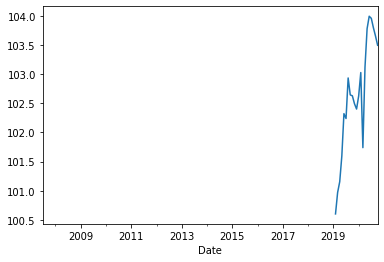

In [667]:
cardDF.loc['DCENT 2019-A1 A1']['Price'].plot()

In [716]:
cols=['Mth Pay Rate', 'Port Yld', 'Chg Offs',30,60,'90+', 'Price']

X=cardDF[cols].dropna()
y=X['Price']
X.drop('Price', axis=1, inplace=True)
X.shape

(389, 6)

In [717]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [718]:
model=LinearRegression()
model.fit(X, y)
pred=model.predict(X)

In [719]:
model.coef_

array([ -5.09538939, -14.65643618,  30.94277022,  16.2880477 ,
        34.727177  , -57.41908016])

In [720]:
model.score(X,y)

0.5090232072165881

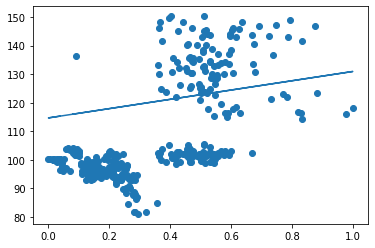

In [741]:
fig=plt.figure()

plt.scatter(X[:,3], y)
plt.plot(X[:,3], [model.intercept_ + model.coef_[3]*i for i in X[:,3]])


In [740]:
model.intercept_

114.65551603420256